# Проект: Прогнозирование оттока клиентов в сети отелей «Как в гостях»

## Описание проекта
    Заказчик этого исследования — сеть отелей "Как в гостях".
С целью привлечения клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако, если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.

### Цель проекта
Разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

### Бизнес-метрика и другие данные
Основная бизнес-метрика для любой сети отелей — её прибыль. \
Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.

**Стоимость номеров отеля:**
* **категория A**: 
    * за ночь — 1 000, 
    * разовое обслуживание — 400;
    
* **категория B**: 
    * за ночь — 800,
    * разовое обслуживание — 350;
* **категория C**: 
    * за ночь — 600, 
    * разовое обслуживание — 350;
* **категория D**: 
    * за ночь — 550, 
    * разовое обслуживание — 150;
* **категория E**: 
    * за ночь — 500, 
    * разовое обслуживание — 150;
* **категория F**: 
    * за ночь — 450, 
    * разовое обслуживание — 150;
* **категория G**: 
    * за ночь — 350,
    * разовое обслуживание — 150.

* **В ценовой политике отеля используются сезонные коэффициенты**: 
    * весной и осенью цены повышаются на 20%, 
    * летом — на 40%. 
* **Убытки отеля в случае отмены брони номера** — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента. 
* **На разработку системы прогнозирования заложен бюджет** — `400'000`.\
При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

### Описание данных
В таблицах `hotel_train` и `hotel_test` содержатся одинаковые столбцы:

* `id` — номер записи;
* `adults` — количество взрослых постояльцев;
* `arrival_date_year` — год заезда;
* `arrival_date_month` — месяц заезда;
* `arrival_date_week_number` — неделя заезда;
* `arrival_date_day_of_month` — день заезда;
* `babies` — количество младенцев;
* `booking_changes` — количество изменений параметров заказа;
* `children` — количество детей от 3 до 14 лет;
* `country` — гражданство постояльца;
* `customer_type` — тип заказчика:
   * *Contract* — договор с юридическим лицом;
   * *Group* — групповой заезд;
   * *Transient* — не связано с договором или групповым заездом;
   * *Transient-party* — не связано с договором или групповым заездом, но связано с бронированием типа *Transient*.
* `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
* `distribution_channel` — канал дистрибуции заказа;
* `is_canceled` — отмена заказа;
* `is_repeated_guest` — признак того, что гость бронирует номер второй раз;
* `lead_time` — количество дней между датой бронирования и датой прибытия;
* `meal` — опции заказа:
   * *SC* — нет дополнительных опций;
   * *BB* — включён завтрак;
   * *HB* — включён завтрак и обед;
   * *FB* — включён завтрак, обед и ужин.
* `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
* `previous_cancellations` — количество отменённых заказов у клиента;
* `required_car_parking_spaces` — необходимость места для автомобиля;
* `reserved_room_type` — тип забронированной комнаты;
* `stays_in_weekend_nights` — количество ночей в выходные дни;
* `stays_in_week_nights` — количество ночей в будние дни;
* `total_nights` — общее количество ночей;
* `total_of_special_requests` — количество специальных отметок.

### Шаг 1. Откройте файлы с данными

#### Загрузим библиотеки и настроим рабочее пространство

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import roc_curve
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import recall_score, precision_score, f1_score
from scipy.stats import uniform
import xgboost as xgb
import time

In [2]:
pd.options.display.max_columns = 30
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('chained_assignment', None)  

#### Загрузим таблицы

In [3]:
try:
    hotel_train = pd.read_csv('datasets/hotel_train.csv', sep=',')
except:
    hotel_train = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_train.csv', sep=',')

In [4]:
try:
    hotel_test = pd.read_csv('datasets/hotel_test.csv', sep=',')
except:
    hotel_test = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_test.csv', sep=',')

In [5]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [6]:
x = np.arange(0, 5, 0.1)
def f(x):
    return x**2

In [7]:
import plotly.io as pio
pio.renderers.default = "svg"

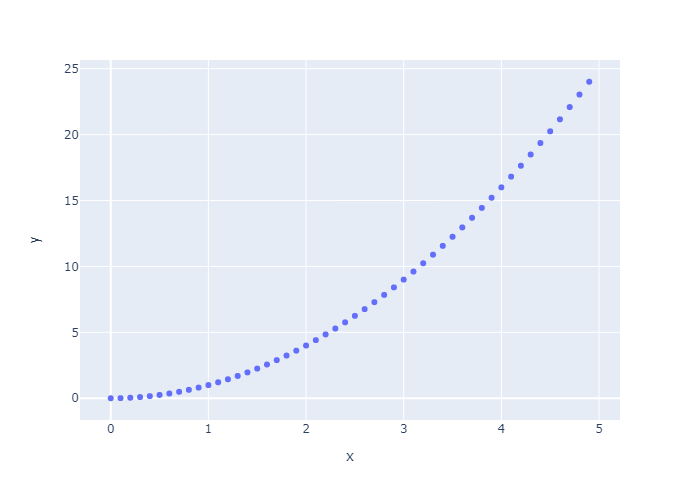

In [8]:
px.scatter(x=x, y=f(x)).show("png")

Запишем функцию основной информации по данным.

In [9]:
def dataframe_summary(df, string):
    # Вывод общей информации
    print("Общая информация по таблице:", string)
    df.info()

    # Вывод статистического описания
    print("\n Статистическое описание:")
    display(df.describe().transpose())

    # Вывод случайных примеров
    print("\nСлучайные примеры:")
    display(df.sample(5))

    # Вывод количества строк и столбцов
    print("\nКоличество строк и столбцов:", df.shape)

    # Вывод количества пропусков
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    print("\nКоличество пропусков по столбцам:")
    if total_missing == 0:
        print("Пропусков нет.")
    else:
        print(missing_values[missing_values > 0])

    # Вывод количества явных дубликатов
    print("\nКоличество явных дубликатов:", df.duplicated().sum())
    print('')

Запишем функцию, которая будет создавть гистограмму и боксплот для двух датасетов (числовые переменные)

In [10]:
def compare_numeric_distribution(df1, df2, column_name):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Изменение размера сетки для графиков

    # Графики распределения
    sns.histplot(df1[column_name], ax=axes[0, 0], kde=True, color='blue')
    axes[0, 0].set_title(f'Распределение {column_name} в hotel_train')
    sns.histplot(df2[column_name], ax=axes[0, 1], kde=True, color='green')
    axes[0, 1].set_title(f'Распределение {column_name} в hotel_test')

    # Боксплоты
    sns.boxplot(x=df1[column_name], ax=axes[1, 0], color='lightblue')
    axes[1, 0].set_title(f'Боксплот {column_name} в hotel_train')
    sns.boxplot(x=df2[column_name], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title(f'Боксплот {column_name} в hotel_test')

    # Графики для is_canceled
    # Для простоты берем среднее значение is_canceled для интервалов значений column_name
    df1_grouped = df1.groupby(pd.cut(df1[column_name], bins=5)).is_canceled.mean()
    df2_grouped = df2.groupby(pd.cut(df2[column_name], bins=5)).is_canceled.mean()
    df1_grouped.plot(kind='bar', ax=axes[2, 0], color='lightblue')
    axes[2, 0].set_title(f'Доля is_canceled по {column_name} в hotel_train')
    df2_grouped.plot(kind='bar', ax=axes[2, 1], color='lightgreen')
    axes[2, 1].set_title(f'Доля is_canceled по {column_name} в hotel_test')

    plt.tight_layout()
    plt.show()

    # Отображение статистических данных
    stats_df1 = df1[column_name].describe()
    stats_df2 = df2[column_name].describe()
    print(f"\nСтатистика для {column_name} в hotel_train:")
    display(stats_df1)
    print(f"\nСтатистика для {column_name} в hotel_test:")
    display(stats_df2)
    

Запишем функцию для сравнения категориальных переменных

In [11]:
def compare_categorical_distribution(df1, df2, column_name):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    sns.countplot(x=column_name, data=df1, ax=axes[0], palette="Set2",hue='is_canceled')
    axes[0].set_title(f'Распределение {column_name} в hotel_train')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Количество')
    axes[0].tick_params(axis='x', rotation=45)

    sns.countplot(x=column_name, data=df2, ax=axes[1], palette="Set1",hue='is_canceled')
    axes[1].set_title(f'Распределение {column_name} во hotel_test')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Количество')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    unique_values_df1 = df1[column_name].value_counts()
    print(f"\nУникальные значения и их количество в hotel_train для {column_name}:")
    
    if len(list(unique_values_df1)) <= 12:
        display(unique_values_df1)
    else:
        display(unique_values_df1.head(10))

    unique_values_df2 = df2[column_name].value_counts()
    
    print(f"\nУникальные значения и их количество во hotel_test для {column_name}:")
    if len(list(unique_values_df2)) <= 12:
        display(unique_values_df2)
    else:
        display(unique_values_df2.head(10))
    plt.show()


Запишем функцию, которая будет менять тип столбца на выбранный по необходимости

In [12]:
def change_column_type(df, column_name, new_type):
    try:
        df[column_name] = df[column_name].astype(new_type)
        print(f"Тип столбца '{column_name}' успешно изменен на {new_type}.")
    except Exception as e:
        print(f"Ошибка при изменении типа: {e}")

Создадим функцию которая преобразует значения в столбце в бинарные (0 или 1)

In [13]:
def convert_to_binary(df, column_names):
    for column in column_names:
        # Изменение названия столбца
        new_column_name = f'is_{column}'
        df[new_column_name] = df[column].apply(lambda x: 1 if x > 0 else 0)

    # Удаление старых столбцов
    df.drop(columns=column_names, inplace=True)

    return df

Создадим функцию, которая уберет пробелы из значений категориальных переменных

In [14]:
def remove_spaces_in_column_names(df, column_name):
    df.columns = df.columns.str.replace(' ', '_')
    return df

### Шаг 2. Предобработка и исследовательский анализ данных

##### Столбец `id`
Сразу предлагаю избавиться от данного столбца, тк полезной информации он не несет, но может оказывать отрицательное влияние на построение моделей.

In [15]:
hotel_train = hotel_train.drop('id', axis=1)
hotel_test = hotel_test.drop('id', axis=1)
display(hotel_train.sample(1))
display(hotel_test.sample(1))

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
45042,0,32.00,2015,December,52,26,2,3,2.00,2.00,0.00,BB,LUX,Direct,0,0,0,F,0,0,Transient,0,1,5


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
10376,1,38.00,2017,March,12,23,0,3,2.00,0.00,0.00,SC,TUR,TA/TO,0,0,0,A,0,0,Transient,0,0,3


In [16]:
dataframe_summary(hotel_test, 'hotel_test')
dataframe_summary(hotel_train, 'hotel_train')

Общая информация по таблице: hotel_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     32412 non-null  int64  
 1   lead_time                       32412 non-null  float64
 2   arrival_date_year               32412 non-null  int64  
 3   arrival_date_month              32412 non-null  object 
 4   arrival_date_week_number        32412 non-null  int64  
 5   arrival_date_day_of_month       32412 non-null  int64  
 6   stays_in_weekend_nights         32412 non-null  int64  
 7   stays_in_week_nights            32412 non-null  int64  
 8   adults                          32412 non-null  float64
 9   children                        32412 non-null  float64
 10  babies                          32412 non-null  float64
 11  meal                            32412 non-null  objec

,count,mean,std,min,25%,50%,75%,max
is_canceled,"32,412.00",0.39,0.49,0.00,0.00,0.00,1.00,1.00
lead_time,"32,412.00",97.59,86.51,0.00,23.00,76.00,155.00,373.00
arrival_date_year,"32,412.00","2,017.00",0.00,"2,017.00","2,017.00","2,017.00","2,017.00","2,017.00"
arrival_date_week_number,"32,412.00",17.80,9.18,1.00,10.00,18.00,25.00,35.00
arrival_date_day_of_month,"32,412.00",15.66,8.77,1.00,8.00,15.50,23.00,31.00
stays_in_weekend_nights,"32,412.00",0.87,0.85,0.00,0.00,1.00,2.00,4.00
stays_in_week_nights,"32,412.00",2.34,1.38,0.00,1.00,2.00,3.00,6.00
adults,"32,412.00",1.86,0.49,0.00,2.00,2.00,2.00,4.00
children,"32,412.00",0.08,0.34,0.00,0.00,0.00,0.00,3.00
babies,"32,412.00",0.01,0.08,0.00,0.00,0.00,0.00,2.00



Случайные примеры:


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
13475,1,86.00,2017,May,20,16,0,4,2.00,0.00,0.00,SC,ITA,TA/TO,0,0,0,A,0,0,Transient,0,0,4
2183,0,120.00,2017,July,26,1,2,6,2.00,0.00,0.00,BB,PRT,Direct,0,0,2,D,1,0,Transient,1,1,8
30481,0,9.00,2017,July,30,27,0,2,2.00,0.00,0.00,BB,ESP,TA/TO,0,0,0,A,0,0,Transient,0,0,2
29702,0,197.00,2017,July,28,10,1,4,2.00,0.00,0.00,BB,IRL,TA/TO,0,0,0,A,0,0,Transient-Party,0,1,5
8866,1,58.00,2017,February,6,11,2,1,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,3



Количество строк и столбцов: (32412, 24)

Количество пропусков по столбцам:
Пропусков нет.

Количество явных дубликатов: 7717

Общая информация по таблице: hotel_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     65229 non-null  int64  
 1   lead_time                       65229 non-null  float64
 2   arrival_date_year               65229 non-null  int64  
 3   arrival_date_month              65229 non-null  object 
 4   arrival_date_week_number        65229 non-null  int64  
 5   arrival_date_day_of_month       65229 non-null  int64  
 6   stays_in_weekend_nights         65229 non-null  int64  
 7   stays_in_week_nights            65229 non-null  int64  
 8   adults                          65229 non-null  float64
 9   children                        65229 non-null

,count,mean,std,min,25%,50%,75%,max
is_canceled,"65,229.00",0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,"65,229.00",96.34,96.13,0.00,17.00,64.00,151.00,374.00
arrival_date_year,"65,229.00","2,015.72",0.45,"2,015.00","2,015.00","2,016.00","2,016.00","2,016.00"
arrival_date_week_number,"65,229.00",31.34,13.46,1.00,21.00,34.00,42.00,53.00
arrival_date_day_of_month,"65,229.00",15.85,8.75,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,"65,229.00",0.83,0.85,0.00,0.00,1.00,2.00,4.00
stays_in_week_nights,"65,229.00",2.22,1.35,0.00,1.00,2.00,3.00,6.00
adults,"65,229.00",1.84,0.48,0.00,2.00,2.00,2.00,4.00
children,"65,229.00",0.07,0.33,0.00,0.00,0.00,0.00,3.00
babies,"65,229.00",0.01,0.10,0.00,0.00,0.00,0.00,10.00



Случайные примеры:


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
11138,0,12.00,2016,March,12,19,2,2,2.00,0.00,0.00,BB,ESP,TA/TO,0,0,0,D,0,0,Transient,0,1,4
15615,0,43.00,2016,November,46,8,0,4,2.00,0.00,0.00,BB,LVA,TA/TO,0,0,0,D,0,0,Transient-Party,0,2,4
26368,1,31.00,2016,April,18,24,1,0,2.00,0.00,0.00,SC,CHN,TA/TO,0,0,0,A,0,0,Transient,0,0,1
49019,0,55.00,2016,April,15,6,0,1,2.00,0.00,0.00,HB,PRT,TA/TO,0,0,0,A,0,0,Transient-Party,0,0,1
56090,0,80.00,2016,July,31,28,0,3,2.00,0.00,0.00,BB,FRA,Direct,0,0,0,D,0,0,Transient,0,0,3



Количество строк и столбцов: (65229, 24)

Количество пропусков по столбцам:
Пропусков нет.

Количество явных дубликатов: 21377



Удалим явные дубликаты из тренировочного набора данных, они могут негативно повлиять на обучение. Но тк данные присутсвуют в большом кол-ве в обоих данных, скорее всего такое происходит в системе часто, поэтому не будем трогать тестовые данные, которые модель изначально не видит.

In [17]:
hotel_train.drop_duplicates(inplace=True)

In [18]:
columns_train = set(hotel_train.columns)
columns_test = set(hotel_test.columns)
print("Количество строк в train:", hotel_train.shape[0]) 
print("Количество строк в test:", hotel_test.shape[0])
# Проверка на совпадение столбцов
if columns_train == columns_test:
    print("Все столбцы в train и test совпадают.")
else:
    print("Существуют различия в столбцах между train и test.")
    print("Столбцы в train, которых нет в test:", columns_train - columns_test)
    print("Столбцы в test, которых нет в train:", columns_test - columns_train)

Количество строк в train: 43852
Количество строк в test: 32412
Все столбцы в train и test совпадают.


#### Пройдемся по каждой колнке в представленных таблицах.
Рассмотрим как распределяются значения в самих таблицах, также сравним распределение данных в обоих датасетах.

##### Столбец `is_canceled`

Столбец `is_canceled` - таргет признак, который мы хотим научится предсказывать.\
Посмотрим на его распределение в тренировочной и тестовой выборке.

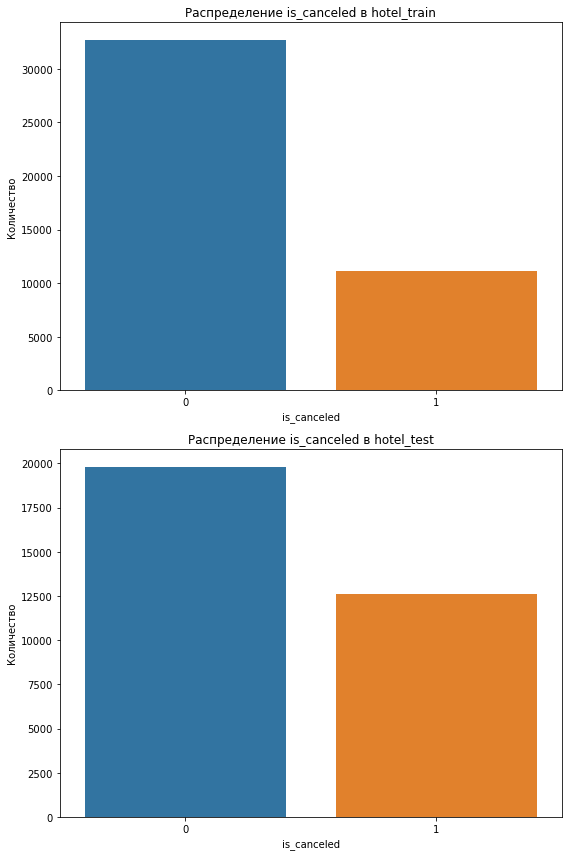

Распределение значений в hotel_train:


,Кол-во значений каждого класса,Процент каждого класса
0,32704,74.58
1,11148,25.42



Распределение значений в hotel_test:


,Кол-во значений каждого класса,Процент каждого класса
0,19821,61.15
1,12591,38.85


In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

sns.countplot(x='is_canceled', data=hotel_train, ax=axes[0])
axes[0].set_title('Распределение is_canceled в hotel_train')
axes[0].set_xlabel('is_canceled')
axes[0].set_ylabel('Количество')

sns.countplot(x='is_canceled', data=hotel_test, ax=axes[1])
axes[1].set_title('Распределение is_canceled в hotel_test')
axes[1].set_xlabel('is_canceled')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

def distribution_table(df):
    counts = df['is_canceled'].value_counts()
    percentages = df['is_canceled'].value_counts(normalize=True) * 100
    distribution = pd.DataFrame({'Кол-во значений каждого класса': counts, 'Процент каждого класса': percentages})
    return distribution

train_distribution = distribution_table(hotel_train)
test_distribution = distribution_table(hotel_test)

print("Распределение значений в hotel_train:")
display(train_distribution)
print("\nРаспределение значений в hotel_test:")
display(test_distribution)

##### Вывод `is_canceled`
* В данных наблюдается небольшой дисбаланс по распределению целевого признака.
* В двух таблицах % дисбаланса примерно одинкаов.
* Дисбаланс 6 к 4
* В процессе создания модели необходимо будет применить один из методов борьбы с дисбалансом.

##### Столбец `lead_time`
Столбец `lead_time` показывает количество дней между датой бронирования и датой прибытия.


In [20]:
print(f"Тип столбца hotel_train: {hotel_train['lead_time'].dtype}")
print(f"Тип столбца hotel_test: {hotel_test['lead_time'].dtype}")


Тип столбца hotel_train: float64
Тип столбца hotel_test: float64


In [21]:
change_column_type(hotel_train, 'lead_time', 'int')
change_column_type(hotel_test, 'lead_time', 'int')

Тип столбца 'lead_time' успешно изменен на int.
Тип столбца 'lead_time' успешно изменен на int.


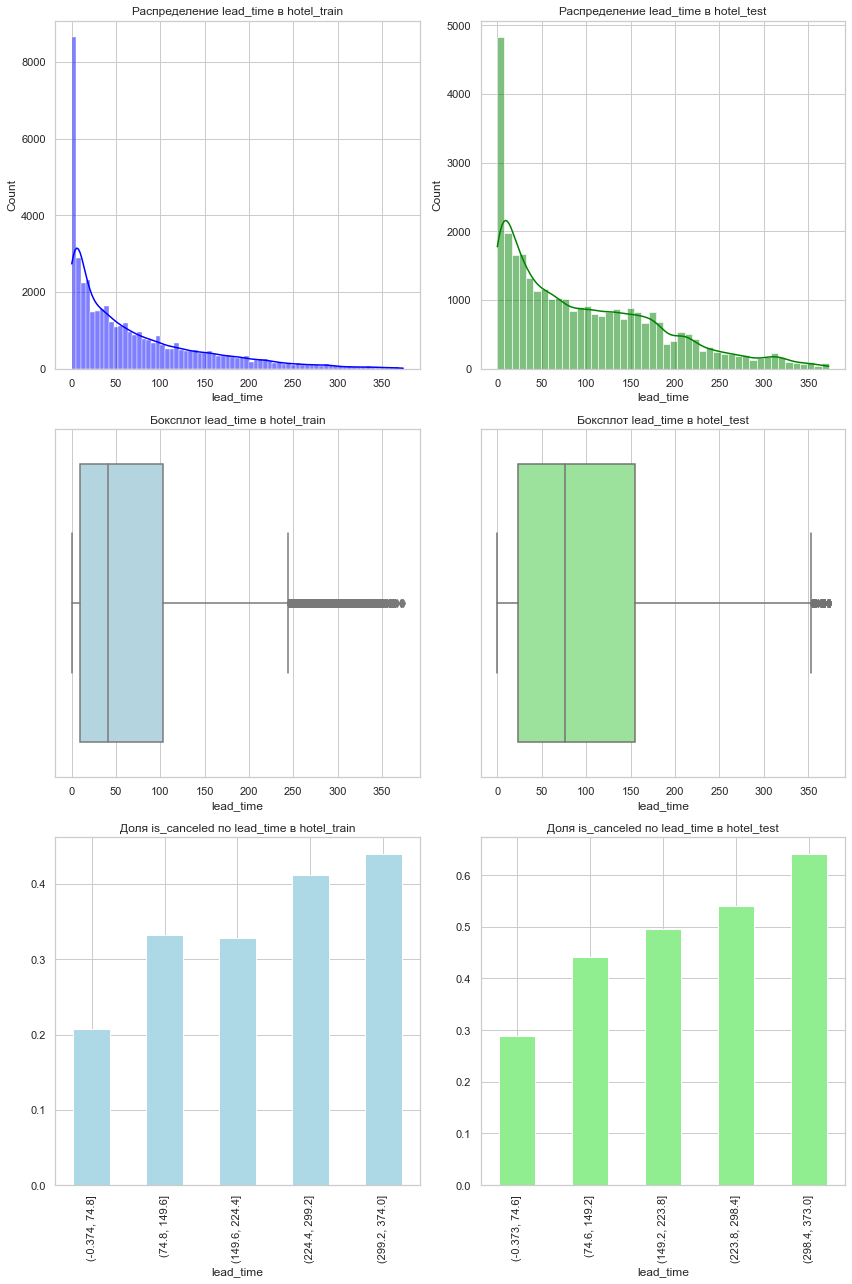


Статистика для lead_time в hotel_train:


count   43,852.00
mean        67.89
std         73.99
min          0.00
25%          9.00
50%         41.00
75%        103.00
max        374.00
Name: lead_time, dtype: float64


Статистика для lead_time в hotel_test:


count   32,412.00
mean        97.59
std         86.51
min          0.00
25%         23.00
50%         76.00
75%        155.00
max        373.00
Name: lead_time, dtype: float64

In [22]:
compare_numeric_distribution(hotel_train, hotel_test, 'lead_time')

##### Вывод
* Изменен тип столбца на корректны.
* На графиках видно, что большАя клиентов бронируют номера день-в-день, что может говорить о специфической направленности отеля.
* Возможно сеть отелей связана с рабочими поездками и недолгим пребыванеием.
* Максимальная возможная бронь - за год до заселения.
* В среднем клиенты бронируют номера за несколько месяцев.
* На мой взгляд этот столбец может играть ключевое влияние на статус итоговой отмены, тк люди, которые бронируют сильно заранее имеют больше времени, чтобы отменить бронь.

##### Столбец `arrival_date_year`

Столбец показывает в каком году проходило заселение.

In [23]:
print('В тестовой выборке данные представлены за:',hotel_test['arrival_date_year'].unique(), 'год(а)')
print('В тренировочной выборке данные представлены за:',hotel_train['arrival_date_year'].unique(), 'год(а)')

В тестовой выборке данные представлены за: [2017] год(а)
В тренировочной выборке данные представлены за: [2015 2016] год(а)


Я считаю, что этот столбец можно не включать в features-признаки, так как очевидно, что год не коррелирует с целевой переменной. В тренировочной выборке представлены данные за 2 прошедших года (2015, 2016), а в тестовой выборке вообще только за (2017). \
Таким образом, тут не идет речи о временных рядах и нет сезонных трендов, зависящих от года. Подобные данные лишь будет усложнять расчеты модели, поэтому от них можно избавиться.


Уникальные значения и их количество в hotel_train для arrival_date_year:


2016    34008
2015     9844
Name: arrival_date_year, dtype: int64


Уникальные значения и их количество во hotel_test для arrival_date_year:


2016    34008
2017    32412
2015     9844
Name: arrival_date_year, dtype: int64

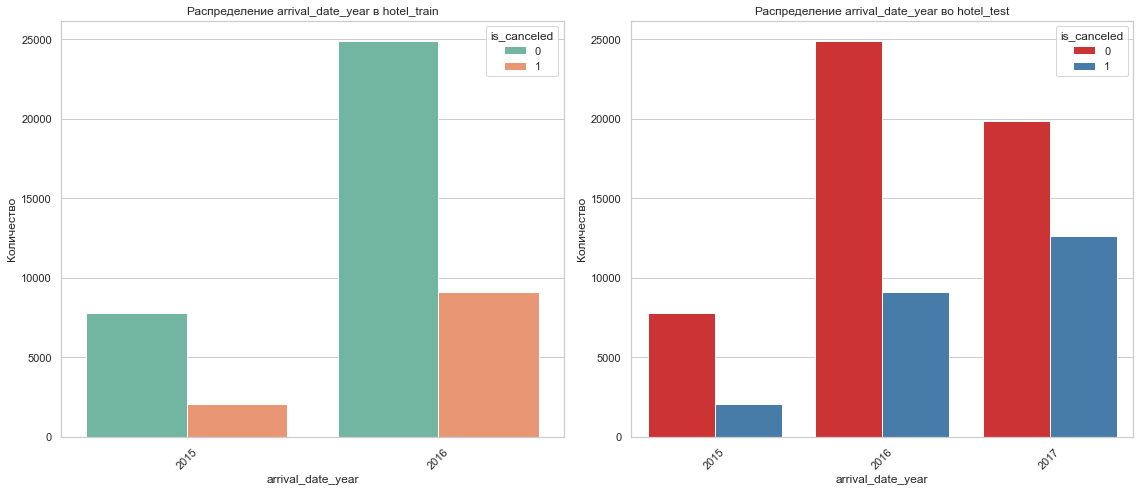

In [24]:
# Посмотрим распределение кол-во броней по годам, а также какую долю в них составляют отмены
compare_categorical_distribution(hotel_train,  pd.concat([hotel_train, hotel_test]), 'arrival_date_year')

Вывод:
* Не будет использовать столбец `arrival_date_year` для построения моделей, год не коррелирует с целевой переменной. В тренировочной выборке представлены данные за 2 прошедших года (2015, 2016), а в тестовой выборке вообще только за (2017).
* Нет сезонных трендов связаных с годом.
* Хотя заметно, что бизнес растоят, однако все большую часть возможной прибыли начинают съедать убытки от отмен брони.
* За 8 месяцев 2017 года клиентов уже больше чем за весь 2015 год.

##### Столбец `arrival_date_mounth`

Данный столбец содержит информацию о месяце заезда клиента.


Уникальные значения и их количество в hotel_train для arrival_date_month:


October      5514
September    5212
August       4725
December     4135
November     4099
July         4016
March        3247
April        3219
May          3086
June         2828
February     2300
January      1471
Name: arrival_date_month, dtype: int64


Уникальные значения и их количество во hotel_test для arrival_date_month:


May         5262
April       4878
June        4580
March       4277
July        3626
February    3543
January     3150
August      3096
Name: arrival_date_month, dtype: int64

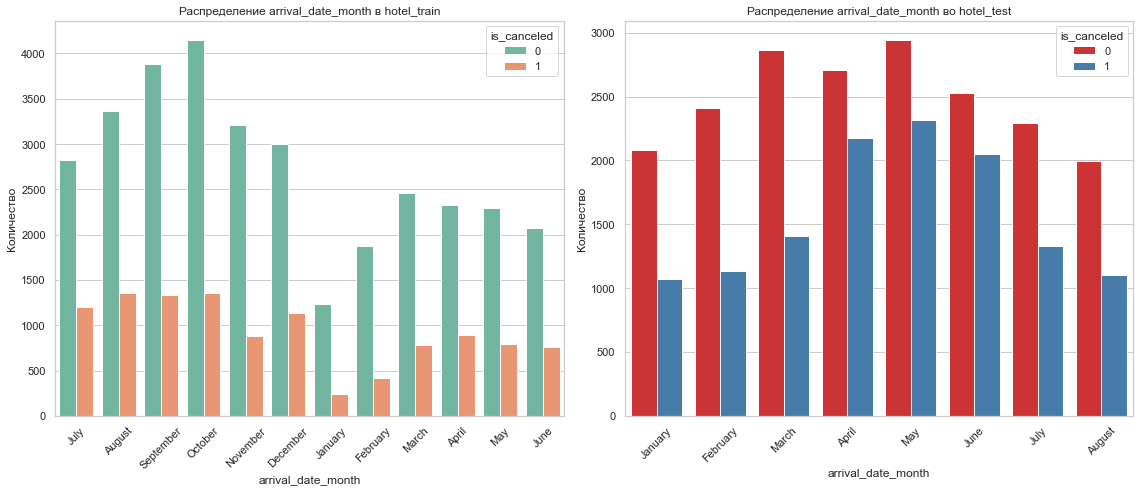

In [25]:
compare_categorical_distribution(hotel_train, hotel_test, 'arrival_date_month')

Вывод:
* Можно отметить, что в тестовых данных данные только за 8 месяцев, когда в тренировочных за все 12.
* Особой зависимости в данных проследить трудно, только то, что меньше всего заездов - в январе.
* В тренировочных данных самые популярные месяца - сентябрь и октябрь, в тестовых они отсутсвуют. 
* Возможно, то что отели используют для рабочих поездок, как мы уже предположили.
* В некоторых месяцах доля отменненых броней достаточно велика. 
(В тренировочных: Сентябрь, Октябрь; В тестовых: Апрель, Май)
* Из-за сезонного коэффицента в +20% можно предположить, что сеть отелей несет серьезный убытки из-за отмены бронирований.

##### Столбцы `arrival_date_week_number`, `arrival_date_day_of_moth`

Переменная `arrival_date_week_number` нам не особо интересна, тк по сути должна быть связана уже с той информацией, что мы получили выше о месяце заезда клиента. \
А вот в какой день месяца клиенты заезжают чаще всего - может быть интересно. 

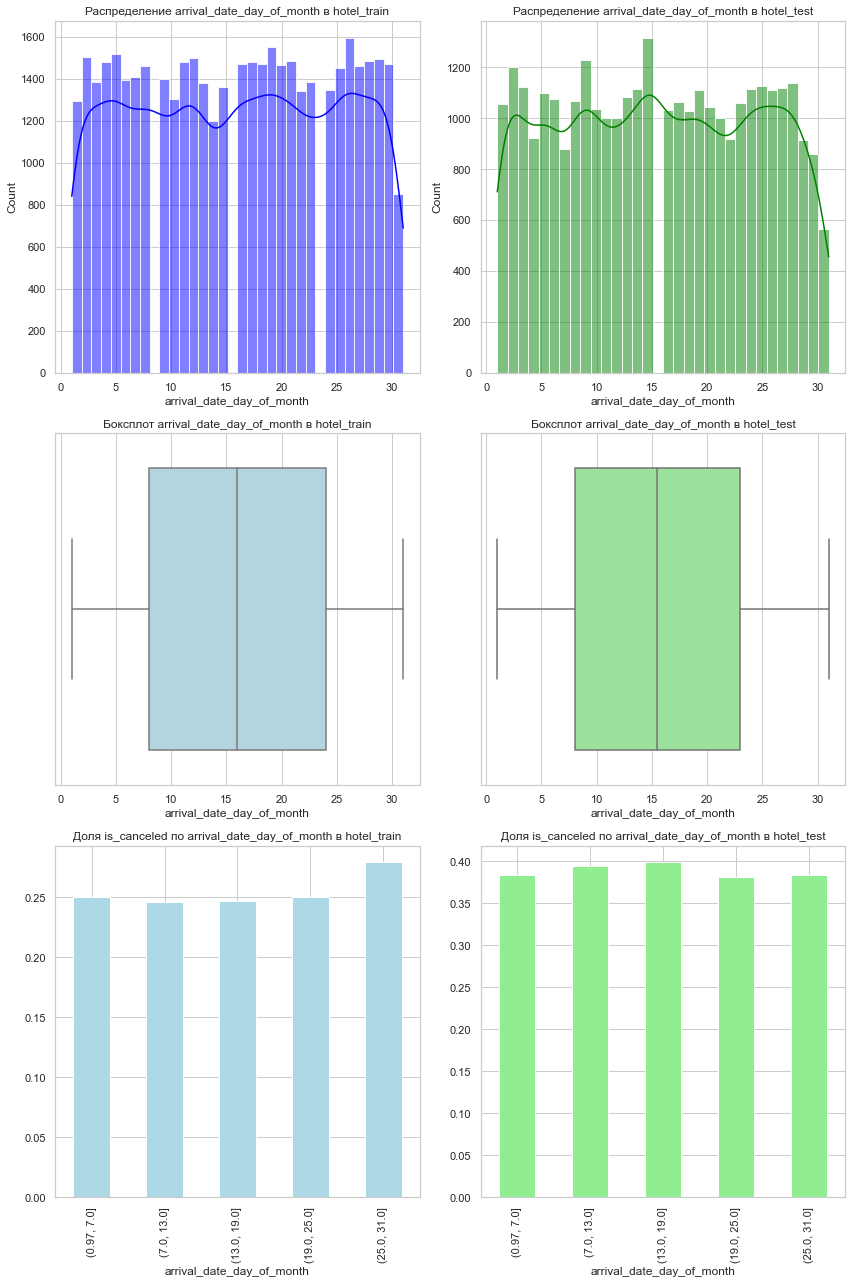


Статистика для arrival_date_day_of_month в hotel_train:


count   43,852.00
mean        15.92
std          8.86
min          1.00
25%          8.00
50%         16.00
75%         24.00
max         31.00
Name: arrival_date_day_of_month, dtype: float64


Статистика для arrival_date_day_of_month в hotel_test:


count   32,412.00
mean        15.66
std          8.77
min          1.00
25%          8.00
50%         15.50
75%         23.00
max         31.00
Name: arrival_date_day_of_month, dtype: float64

In [26]:
compare_numeric_distribution(hotel_train, hotel_test, 'arrival_date_day_of_month')

Вывод:
* Можно говорить о том, что клиенты не любят заезжать в отель в конце месяца.
* Основные заезды приходятся либо на середину, либо на начало месяца.
* Опять же, в середине месяца доля отмен высока. Скорее всего отель несет сравнительно большие убытки в середине месяца.

##### Столбцы `stays_in_weekend_nights`, `stays_in_week_nights` и `total_nights`

`total_nights` - уже содержит информацию из `stays_in_weekend_nights` и `stays_in_week_nights`.\
Поэтому, думаю нагляднее будет сравнить распределение значений из `total_nights`

In [27]:
print(f"Тип столбца total_nights в hotel_train: {hotel_train['total_nights'].dtype}")
print(f"Тип столбца total_nights в hotel_test: {hotel_test['total_nights'].dtype}")

Тип столбца total_nights в hotel_train: int64
Тип столбца total_nights в hotel_test: int64



Уникальные значения и их количество в hotel_train для stays_in_week_nights:


1    12150
2    11092
3     8627
5     4321
4     4047
0     3051
6      564
Name: stays_in_week_nights, dtype: int64


Уникальные значения и их количество во hotel_test для stays_in_week_nights:


2    9004
1    8038
3    7326
4    2975
5    2869
0    1937
6     263
Name: stays_in_week_nights, dtype: int64

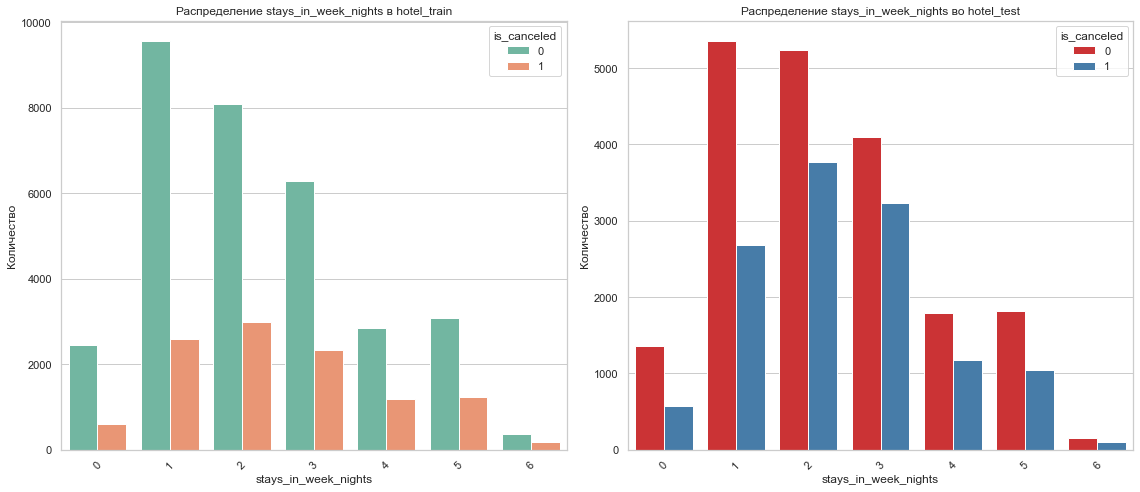


Уникальные значения и их количество в hotel_train для stays_in_weekend_nights:


0    18376
2    12955
1    12163
3      213
4      145
Name: stays_in_weekend_nights, dtype: int64


Уникальные значения и их количество во hotel_test для stays_in_weekend_nights:


0    13915
2     9221
1     9105
3      101
4       70
Name: stays_in_weekend_nights, dtype: int64

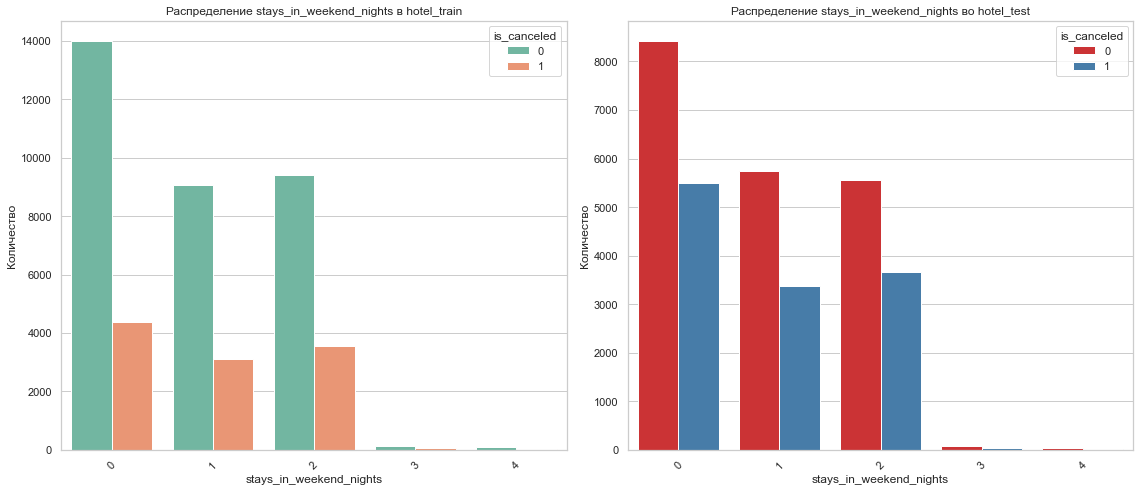


Уникальные значения и их количество в hotel_train для total_nights:


3     9632
1     9359
2     8442
4     7216
5     3599
7     3280
6     1609
8      477
9      124
10     114
Name: total_nights, dtype: int64


Уникальные значения и их количество во hotel_test для total_nights:


3     8395
2     6760
4     5828
1     5465
5     2409
7     2284
6      939
8      215
9       62
10      55
Name: total_nights, dtype: int64

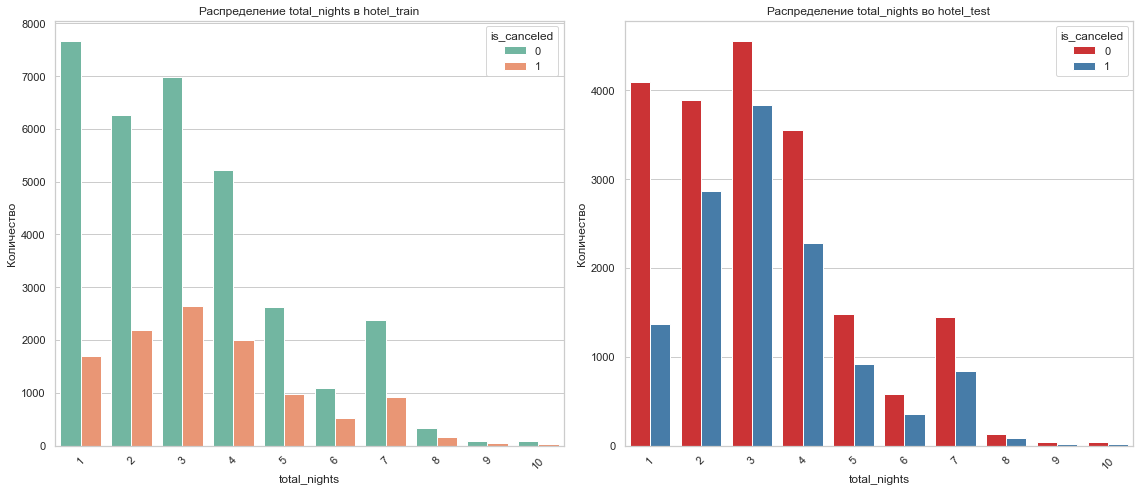

In [28]:
compare_categorical_distribution(hotel_train, hotel_test, "stays_in_week_nights")
compare_categorical_distribution(hotel_train, hotel_test, "stays_in_weekend_nights")
compare_categorical_distribution(hotel_train, hotel_test, "total_nights")

Вывод:
* По этим графикам видно, что клиенты не задерживаются больше чем на 10 ночей.
* Чаще всего клиенты бронируют номер на 1-4 дня.
* Это может говорить о том, что эти отели пользуется популярностью для рабочих поездок.
* Либо, что их предпочетают путешественники, но это пока не точно, требует дальнейшей оценки.
* Люди, которые останавливаются на 1 ночь, в среднем менее сколнны отменять бронирование.

##### Столбцы `adults`, `children` и `babies`

В этих столбцах содержится информация о кол-ве взрослых, детей и младенцев в бронируемом номере.


In [29]:
print(f"Тип столбца adults в hotel_train: {hotel_train['adults'].dtype}")
print(f"Тип столбца adults в hotel_test: {hotel_test['adults'].dtype}")
print('----------------')
print(f"Тип столбца children в hotel_train: {hotel_train['children'].dtype}")
print(f"Тип столбца children в hotel_test: {hotel_test['children'].dtype}")
print('----------------')
print(f"Тип столбца babies в hotel_train: {hotel_train['babies'].dtype}")
print(f"Тип столбца babies в hotel_test: {hotel_test['babies'].dtype}")
print('----------------') 

Тип столбца adults в hotel_train: float64
Тип столбца adults в hotel_test: float64
----------------
Тип столбца children в hotel_train: float64
Тип столбца children в hotel_test: float64
----------------
Тип столбца babies в hotel_train: float64
Тип столбца babies в hotel_test: float64
----------------


На мой взгляд, тип этих переменных неправильный - им лучше подойдет int. \
Тк речь идет о сугубо целочисленных значениях. (не может быть 2.3 взрослых или 0.6 детей)

In [30]:
change_column_type(hotel_train, 'adults', 'int')
change_column_type(hotel_test, 'adults', 'int')
print('----------------')
change_column_type(hotel_train, 'children', 'int')
change_column_type(hotel_test, 'children', 'int')
print('----------------')
change_column_type(hotel_train, 'babies', 'int')
change_column_type(hotel_test, 'babies', 'int')

Тип столбца 'adults' успешно изменен на int.
Тип столбца 'adults' успешно изменен на int.
----------------
Тип столбца 'children' успешно изменен на int.
Тип столбца 'children' успешно изменен на int.
----------------
Тип столбца 'babies' успешно изменен на int.
Тип столбца 'babies' успешно изменен на int.


Посмотрим на распределение значений в `adults`

In [31]:
print('Кол-во значений по каждому кол-ву взослых hotel_train')
print(hotel_train['adults'].value_counts())
print('----------------')
print('Кол-во значений по каждому кол-ву взослых hotel_test')
print(hotel_test['adults'].value_counts())

Кол-во значений по каждому кол-ву взослых hotel_train
2    32299
1     8688
3     2688
0      164
4       13
Name: adults, dtype: int64
----------------
Кол-во значений по каждому кол-ву взослых hotel_test
2    24237
1     6280
3     1817
0       69
4        9
Name: adults, dtype: int64


Посмотрим на распределение значений в `children` и `babies`

In [32]:
print('Кол-во значений по каждому кол-ву детей hotel_train')
print(hotel_train['children'].value_counts())
print('----------------')
print('Кол-во значений по каждому кол-ву детей hotel_test')
print(hotel_test['children'].value_counts())
print('----------------')
print('Кол-во значений по каждому кол-ву младенцев hotel_train')
print(hotel_train['babies'].value_counts())
print('----------------')
print('Кол-во значений по каждому кол-ву младенцев hotel_test')
print(hotel_test['babies'].value_counts())

Кол-во значений по каждому кол-ву детей hotel_train
0    40471
1     2060
2     1305
3       16
Name: children, dtype: int64
----------------
Кол-во значений по каждому кол-ву детей hotel_test
0    30360
1     1394
2      653
3        5
Name: children, dtype: int64
----------------
Кол-во значений по каждому кол-ву младенцев hotel_train
0     43403
1       444
2         3
10        1
9         1
Name: babies, dtype: int64
----------------
Кол-во значений по каждому кол-ву младенцев hotel_test
0    32237
1      171
2        4
Name: babies, dtype: int64


* Видим, что в значениях переменной также присутсвует малое кол-во выбросов.
* Также можно заметить, что подавляющее большитсво значений равно `0` в этих переменных. Выше `1` значения практически не встречаются. 
* В таком случае предлагаю сделать переменную бинарной. 
* Преобразование количественных переменных в бинарные может упростить модель, делая ее более интерпретируемой и уменьшая риск переобучения, особенно если большинство значений уже являются 0 или 1.
* Наши данные содержат редкие случаи, где значение переменной существенно отличается от большинства (например, большое количество детей или младенцев), преобразование в бинарный формат помогает снизить влияние этих выбросов на модель.
* В некоторых случаях более важно наличие характеристики (например, наличие детей или младенцев), чем ее количественное значение. Преобразование в бинарный формат позволяет модели сосредоточиться на этом аспекте.
* Многие алгоритмы машинного обучения работают лучше или проще интерпретируются с бинарными или категориальными данными, в отличие от количественных переменных.

In [33]:
for data in [hotel_train, hotel_test]:
    data = convert_to_binary(data, ['children', 'babies'])

In [34]:
display(hotel_train.sample(2))
display(hotel_test.sample(2))

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,is_children,is_babies
34147,1,67,2016,October,43,17,1,0,1,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1,0,0
23197,1,1,2016,January,4,20,0,2,2,SC,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,2,0,0


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,is_children,is_babies
17793,1,162,2017,August,33,19,1,1,2,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,2,0,0
12517,1,13,2017,May,18,2,0,2,1,SC,ESP,TA/TO,0,0,0,A,0,0,Transient,0,1,2,0,0


Построим графики распределений для переменных и сделаем выводы

In [35]:
hotel_train['adults'].value_counts()

2    32299
1     8688
3     2688
0      164
4       13
Name: adults, dtype: int64

In [36]:
# тк в данных кол-во взрослых практически не бывает больше 3 - приравняем все значения больше 3 к 3, чтобы не терять данные
for data in [hotel_train, hotel_test]:
    data['adults'] = data['adults'].apply(lambda x: 3 if x >3 else x)

In [37]:
zero_adults = 0
for data in [hotel_train, hotel_test]:
    zero_adults += data.query('adults == 0').shape[0]

print('БрЁоней без постояльцев в обоих датасетах:',zero_adults)

БрЁоней без постояльцев в обоих датасетах: 233


In [38]:
for data in [hotel_train, hotel_test]:
    data.drop(hotel_train.query('adults == 0').index, inplace=True)


Уникальные значения и их количество в hotel_train для adults:


2    32299
1     8688
3     2701
Name: adults, dtype: int64


Уникальные значения и их количество во hotel_test для adults:


2    24237
1     6280
3     1826
0       69
Name: adults, dtype: int64

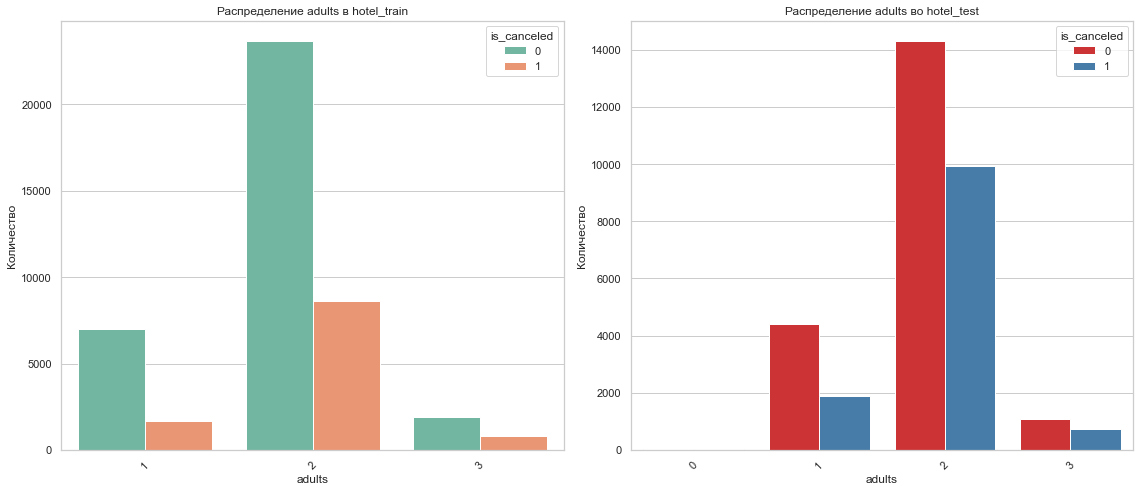


Уникальные значения и их количество в hotel_train для is_children:


0    40456
1     3232
Name: is_children, dtype: int64


Уникальные значения и их количество во hotel_test для is_children:


0    30360
1     2052
Name: is_children, dtype: int64

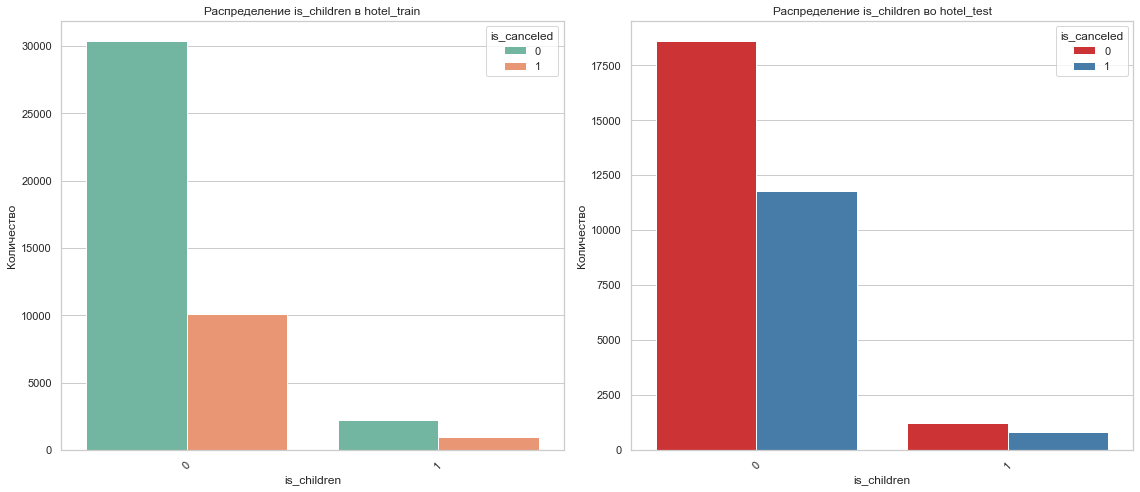


Уникальные значения и их количество в hotel_train для is_babies:


0    43242
1      446
Name: is_babies, dtype: int64


Уникальные значения и их количество во hotel_test для is_babies:


0    32237
1      175
Name: is_babies, dtype: int64

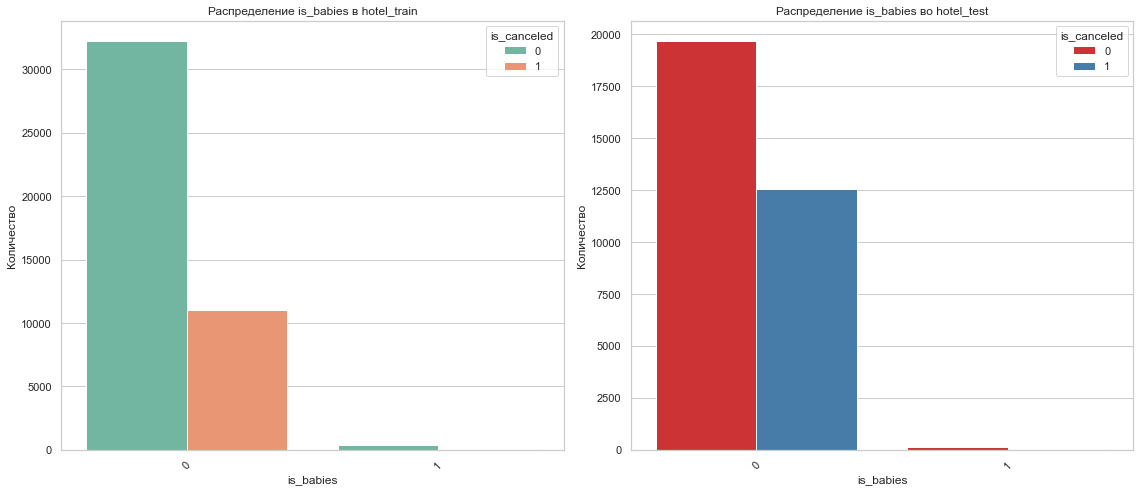

In [39]:
compare_categorical_distribution(hotel_train, hotel_test, "adults")
compare_categorical_distribution(hotel_train, hotel_test, "is_children")
compare_categorical_distribution(hotel_train, hotel_test, "is_babies")

Вывод:
* Устранили выбросы в `adults`
* `babies` и `children` стали: `is_babies` и `is_children` - бинарными. 
* В обоих выборках чаще всего номер бронируют по 2 человека, хотя число детей и младенцев в подовляющем большинства случаев равно 0. 
* Это может говорить в пользу нашего предположения о рабочей направленности сетей отелей.
* Кол-во взрослых, детей или младенцев - судя по графикам, не связано с фактом отемны брони. Отменяют в равных степенях.

##### Столбцы `meal`, `reserved_room_type`, `total_of_special_requests` и `distribution_channel`

Переменные `meal`, `reserved_room_type`, `total_of_special_requests` и `distribution_channel` стоит сравнивать вместе.\
Они могут дать понимание о том, какие постояльцы зачастую пользуются этой сетью отелей.

In [40]:
print(hotel_train['meal'].unique())
print(hotel_test['meal'].unique())

['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']
['BB       ' 'HB       ' 'SC' 'FB       ' 'SC       ']


In [41]:
print(hotel_train['reserved_room_type'].unique())
print(hotel_test['reserved_room_type'].unique())

['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']
['A               ' 'E               ' 'G               '
 'D               ' 'F               ' 'C               '
 'B               ']


In [42]:
hotel_train['reserved_room_type'] = hotel_train['reserved_room_type'].str.strip()
hotel_test['reserved_room_type'] = hotel_test['reserved_room_type'].str.strip()
hotel_test['meal'] = hotel_test['meal'].str.strip()
hotel_train['meal'] = hotel_train['meal'].str.strip()

In [43]:
print(hotel_train['reserved_room_type'].unique())
print(hotel_train['meal'].unique())

['A' 'C' 'D' 'E' 'G' 'F' 'B']
['BB' 'FB' 'HB' 'SC']


In [44]:
print(hotel_train['distribution_channel'].unique())
print(hotel_test['distribution_channel'].unique())

['Direct' 'TA/TO' 'Corporate' 'GDS']
['TA/TO' 'Direct' 'Corporate' 'GDS']



Уникальные значения и их количество в hotel_train для meal:


BB    35403
SC     4809
HB     3341
FB      135
Name: meal, dtype: int64


Уникальные значения и их количество во hotel_test для meal:


BB    24684
SC     5293
HB     2399
FB       36
Name: meal, dtype: int64

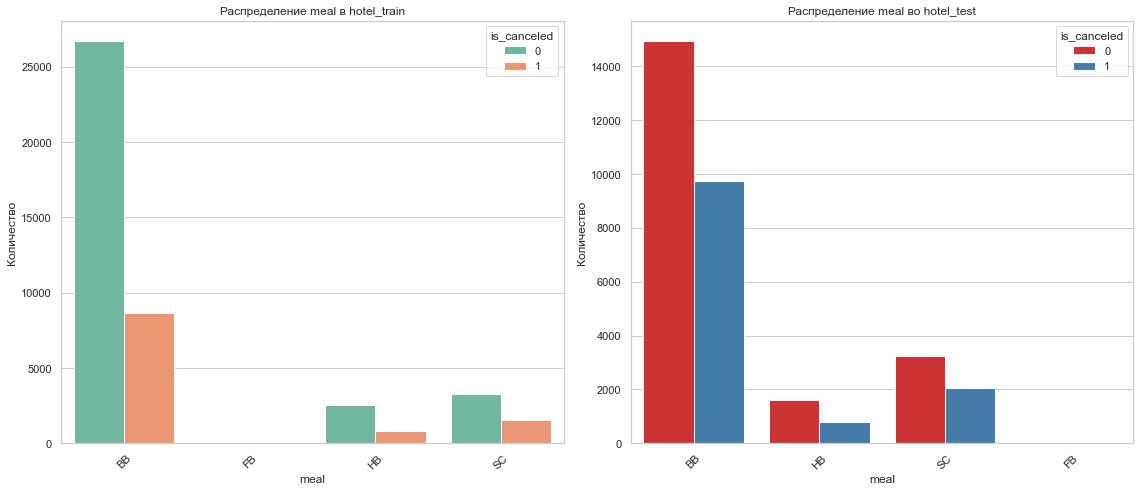


Уникальные значения и их количество в hotel_train для reserved_room_type:


A    30432
D     8421
E     2251
F     1176
B      601
G      580
C      227
Name: reserved_room_type, dtype: int64


Уникальные значения и их количество во hotel_test для reserved_room_type:


A    23471
D     6123
E     1644
F      503
G      278
C      201
B      192
Name: reserved_room_type, dtype: int64

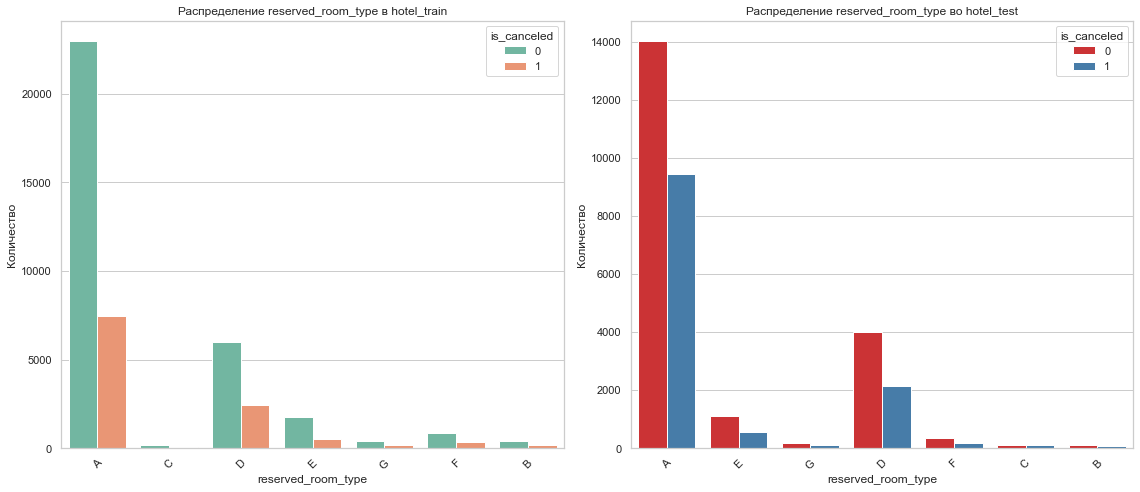


Уникальные значения и их количество в hotel_train для total_of_special_requests:


0    22370
1    14527
2     5750
3      933
4       98
5       10
Name: total_of_special_requests, dtype: int64


Уникальные значения и их количество во hotel_test для total_of_special_requests:


0    17338
1    10037
2     3988
3      907
4      124
5       18
Name: total_of_special_requests, dtype: int64

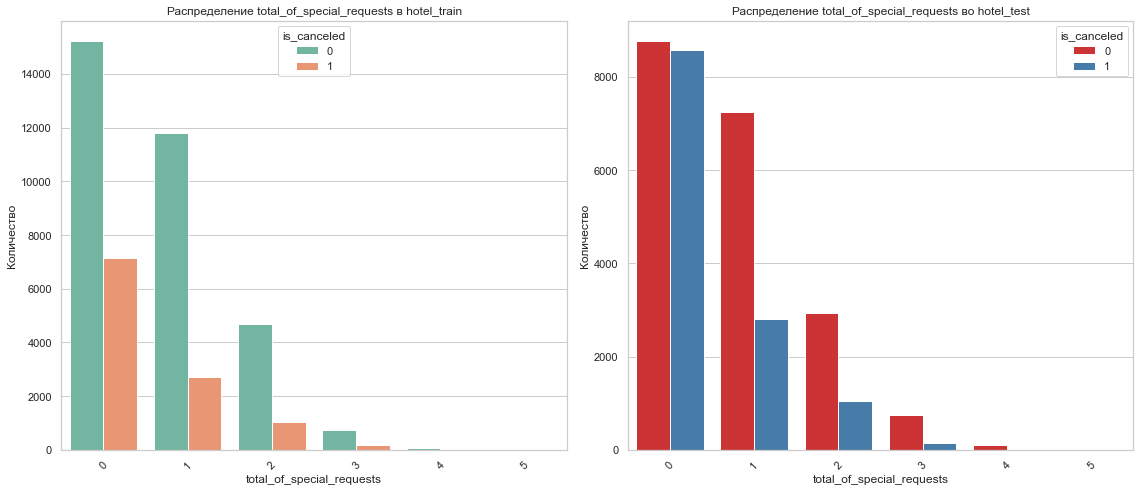


Уникальные значения и их количество в hotel_train для distribution_channel:


TA/TO        35044
Direct        5800
Corporate     2754
GDS             90
Name: distribution_channel, dtype: int64


Уникальные значения и их количество во hotel_test для distribution_channel:


TA/TO        27083
Direct        3642
Corporate     1602
GDS             85
Name: distribution_channel, dtype: int64

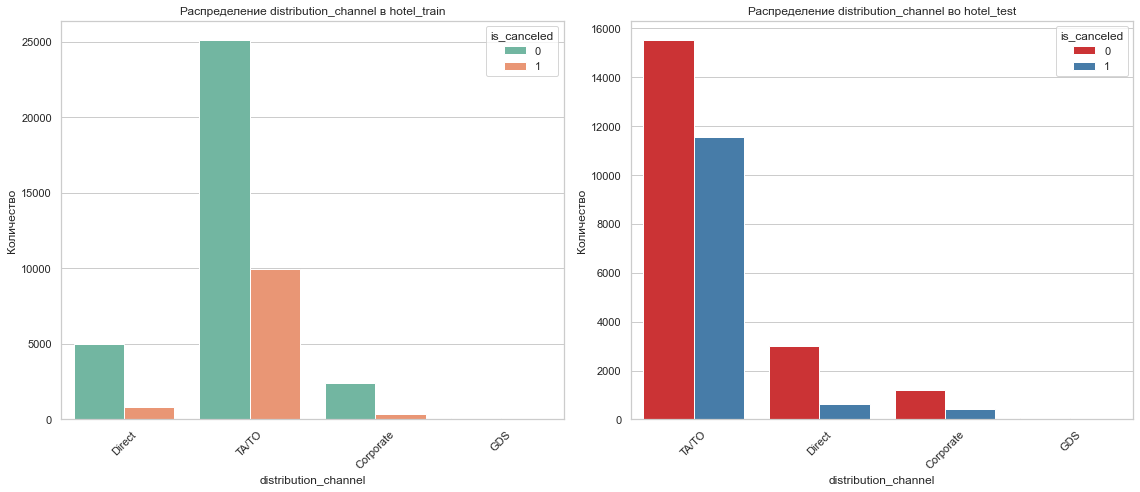


Уникальные значения и их количество в hotel_train для customer_type:


Transient          35279
Transient-Party     6278
Contract            1873
Group                258
Name: customer_type, dtype: int64


Уникальные значения и их количество во hotel_test для customer_type:


Transient          27461
Transient-Party     4427
Contract             359
Group                165
Name: customer_type, dtype: int64

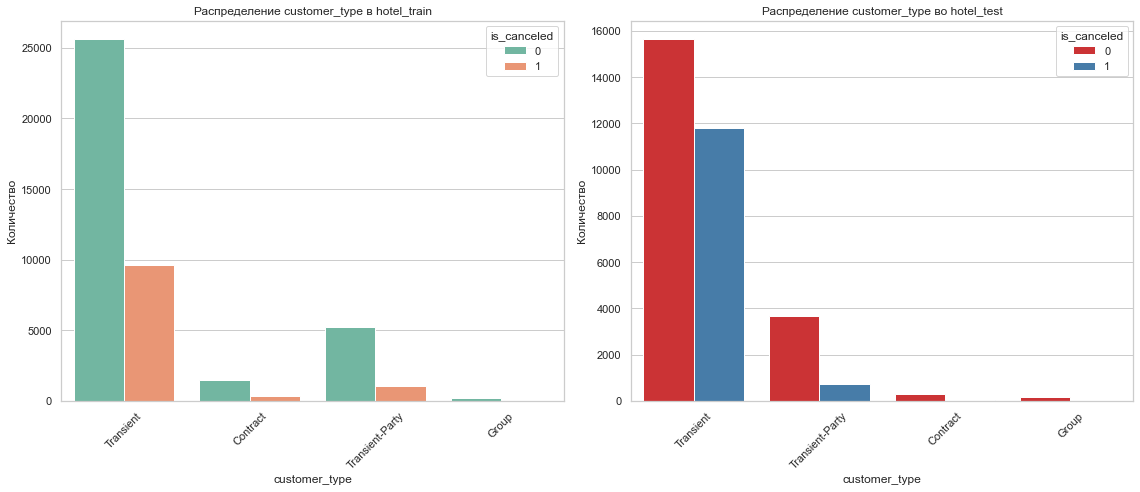

In [45]:
compare_categorical_distribution(hotel_train, hotel_test, "meal")
compare_categorical_distribution(hotel_train, hotel_test, "reserved_room_type")
compare_categorical_distribution(hotel_train, hotel_test, "total_of_special_requests")
compare_categorical_distribution(hotel_train, hotel_test, "distribution_channel")
compare_categorical_distribution(hotel_train, hotel_test, "customer_type")

Вывод:
* Зачастую клиенты выбирают высшую категорию номеров с завтраками, иногда с обедами.
* Специальных специальных отменок отеля зачастую равно `0`.
* Опять же, эти метрики говорят о том, что клиенты скорее всего пользуются услугами этой сети отелей для рабочих поездок.
* Тем не менее, в контексте каналов распределения бронирования большинство броней номеров сделаны через туристических агентов. (`TA/TO` - "Travel Agent/Tour Operator")
* Лишь малая часть клиентов поступает либо по корпоративным каналам (`Corporate`), либо через прямое бронирование (`Direct`).
* В двух датасетах тип заказчика `Transient` и `Transient-party` преобладает.
* Удивительно, но людл, которые не добавляют доп меток к заказу отменяют и подтверждают бронь в равной доле. `Transient` часто относится к индивидуальным путешественникам или туристам, которые бронируют проживание без каких-либо договоров или групповых заездов. Это может означать, что большинство клиентов являются отдельными путешественниками или маленькими семьями, а не частью больших туристических групп или корпоративных клиентов.
* Если человек хоть немного корректирует заказ, он отменит бронь с меньшим шансом.
* Также корпоративные клиенты и люди оформаляющие себе бронь напрямую отменяют бронь реже, чем те, кто бронирует через тур-оператора. 
Поскольку `Transient` обычно не связан с долгосрочными договорами или заранее запланированными групповыми заездами, это может указывать на значительную долю спонтанных или краткосрочных бронирований, возможно, сделанных через онлайн-платформы бронирования.
*  Тип `Transient-party` относится к бронированиям, которые не связаны с договором или групповым заездом, но связаны с другими бронированиями типа Transient. Это может включать ситуации, когда друзья или семьи бронируют отдельно, но связаны между собой. Это указывает на наличие социальных связей между разными бронированиями, что может быть важно для маркетинговых и операционных стратегий отеля.
* Теперь, по моему мнению, начинает складываться картина, что сетью отелей пользуются путешеснвенники, которые долго в отеле не задерживются. Возможно, тип сети отелей напоминает хостел, где клиент может ненадолго остановиться, перевести дух и поехать дальше.
* Это будет ясно при дальнейшем изучении переменных.

In [46]:
hotel_test.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'is_children',
       'is_babies'],
      dtype='object')

##### Столбцы `is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`

In [47]:
print(hotel_train.shape)
print(hotel_test.shape)

(43688, 24)
(32412, 24)


In [48]:
print('Кол-во значений is_repeated_guest в hotel_train')
print(hotel_train['is_repeated_guest'].value_counts())
print('----------------')
print('Кол-во значений is_repeated_guest в hotel_test')
print(hotel_test['is_repeated_guest'].value_counts())
print('----------------')
print('Кол-во значений previous_cancellations в hotel_train')
print(hotel_train['previous_cancellations'].value_counts().head(5))
print('----------------')
print('Кол-во значений previous_cancellations в hotel_test')
print(hotel_test['previous_cancellations'].value_counts().head(5))
print('----------------')
print('Кол-во значений previous_bookings_not_canceled в hotel_train')
print(hotel_train['previous_bookings_not_canceled'].value_counts().head(5))
print('----------------')
print('Кол-во значений previous_bookings_not_canceled в hotel_test')
print(hotel_test['previous_bookings_not_canceled'].value_counts().head(5))
print('----------------')
print('Кол-во значений booking_changes в hotel_train')
print(hotel_train['booking_changes'].value_counts().head(5))
print('----------------')
print('Кол-во значений booking_changes в hotel_test')
print(hotel_test['booking_changes'].value_counts().head(5))
print('----------------')

Кол-во значений is_repeated_guest в hotel_train
0    42245
1     1443
Name: is_repeated_guest, dtype: int64
----------------
Кол-во значений is_repeated_guest в hotel_test
0    31395
1     1017
Name: is_repeated_guest, dtype: int64
----------------
Кол-во значений previous_cancellations в hotel_train
0     42538
1       994
2        52
3        47
11       27
Name: previous_cancellations, dtype: int64
----------------
Кол-во значений previous_cancellations в hotel_test
0    32186
1      165
2       29
6       15
4       10
Name: previous_cancellations, dtype: int64
----------------
Кол-во значений previous_bookings_not_canceled в hotel_train
0    42205
1      597
2      251
3      134
4      113
Name: previous_bookings_not_canceled, dtype: int64
----------------
Кол-во значений previous_bookings_not_canceled в hotel_test
0    31362
1      424
2      161
3       87
4       59
Name: previous_bookings_not_canceled, dtype: int64
----------------
Кол-во значений booking_changes в hotel_trai

In [49]:
print('Кол-во значений days_in_waiting_list в hotel_train')
print(hotel_train['days_in_waiting_list'].value_counts().head(5))
print('----------------')
print('Кол-во значений days_in_waiting_list в hotel_test')
print(hotel_test['days_in_waiting_list'].value_counts().head(5))
print('----------------')
print('Кол-во значений required_car_parking_spaces в hotel_train')
print(hotel_train['required_car_parking_spaces'].value_counts().head(5))
print('----------------')
print('Кол-во значений required_car_parking_spaces в hotel_test')
print(hotel_test['required_car_parking_spaces'].value_counts().head(5))


Кол-во значений days_in_waiting_list в hotel_train
0     43208
63       42
15       19
87       18
48       16
Name: days_in_waiting_list, dtype: int64
----------------
Кол-во значений days_in_waiting_list в hotel_test
0     32235
60        6
71        6
25        6
59        6
Name: days_in_waiting_list, dtype: int64
----------------
Кол-во значений required_car_parking_spaces в hotel_train
0    40091
1     3585
2       11
3        1
Name: required_car_parking_spaces, dtype: int64
----------------
Кол-во значений required_car_parking_spaces в hotel_test
0    30935
1     1468
2        6
8        2
3        1
Name: required_car_parking_spaces, dtype: int64


* Посмотрев на распределение значений в переменных `previous_cancellations`, `days_in_waiting_list`, `required_car_parking_spaces`, `booking_changes` - можно сказать, что повторяется ситуация со столбцами `babies` и `children`
* Большинство значений равно 0, и за редким исключением столбцы равны 1 или имеют другое значение.
* Применим нашу функцию `convert_to_binary` к этим переменным в тренировочной и тестовой выборке.
   * `previous_bookings_not_canceled` - по сути, уточняет информацию столбца `is_repeated_guest`, если `is_repeated_guest` = 1, то  `previous_bookings_not_canceled` показывает сколько подтвержденных заказов у клиента. А если клиент новый, то соответсвенно и подвержденных заказов у него нет.

In [50]:
hotel_train = convert_to_binary(hotel_train, ['booking_changes', 
                                              'days_in_waiting_list', 
                                              'previous_bookings_not_canceled', 
                                              'previous_cancellations', 
                                              'required_car_parking_spaces'])

hotel_test = convert_to_binary(hotel_test, ['booking_changes', 
                                              'days_in_waiting_list', 
                                              'previous_bookings_not_canceled', 
                                              'previous_cancellations', 
                                              'required_car_parking_spaces'])

In [51]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43688 entries, 0 to 65228
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   is_canceled                        43688 non-null  int64 
 1   lead_time                          43688 non-null  int32 
 2   arrival_date_year                  43688 non-null  int64 
 3   arrival_date_month                 43688 non-null  object
 4   arrival_date_week_number           43688 non-null  int64 
 5   arrival_date_day_of_month          43688 non-null  int64 
 6   stays_in_weekend_nights            43688 non-null  int64 
 7   stays_in_week_nights               43688 non-null  int64 
 8   adults                             43688 non-null  int64 
 9   meal                               43688 non-null  object
 10  country                            43688 non-null  object
 11  distribution_channel               43688 non-null  object
 12  is_r


Уникальные значения и их количество в hotel_train для is_repeated_guest:


0    42245
1     1443
Name: is_repeated_guest, dtype: int64


Уникальные значения и их количество во hotel_test для is_repeated_guest:


0    31395
1     1017
Name: is_repeated_guest, dtype: int64

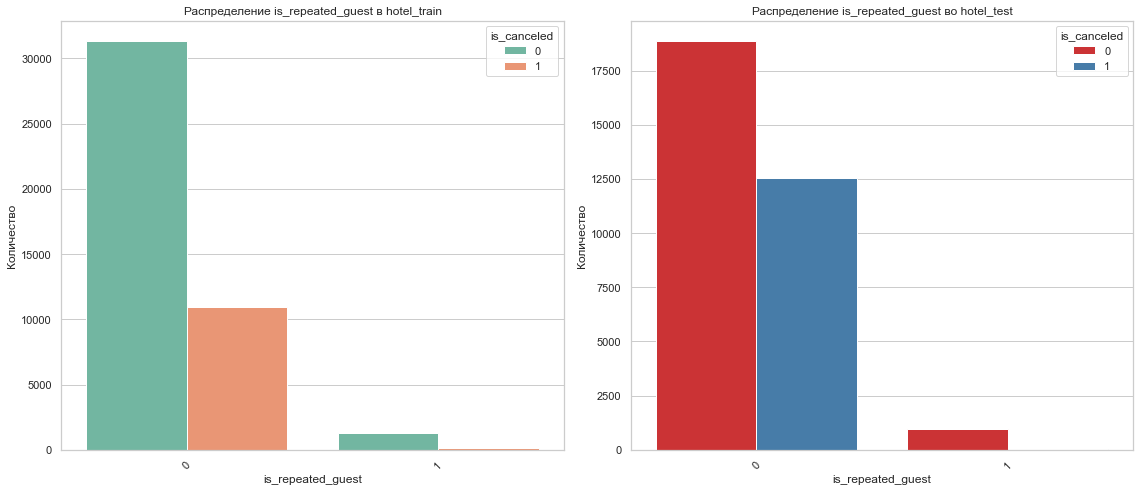


Уникальные значения и их количество в hotel_train для is_previous_cancellations:


0    42538
1     1150
Name: is_previous_cancellations, dtype: int64


Уникальные значения и их количество во hotel_test для is_previous_cancellations:


0    32186
1      226
Name: is_previous_cancellations, dtype: int64

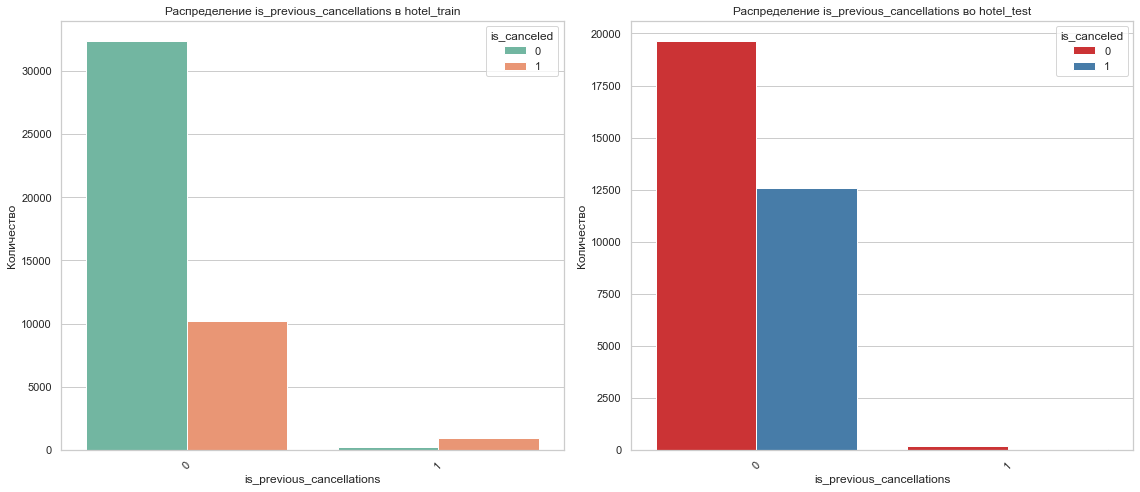


Уникальные значения и их количество в hotel_train для is_previous_bookings_not_canceled:


0    42205
1     1483
Name: is_previous_bookings_not_canceled, dtype: int64


Уникальные значения и их количество во hotel_test для is_previous_bookings_not_canceled:


0    31362
1     1050
Name: is_previous_bookings_not_canceled, dtype: int64

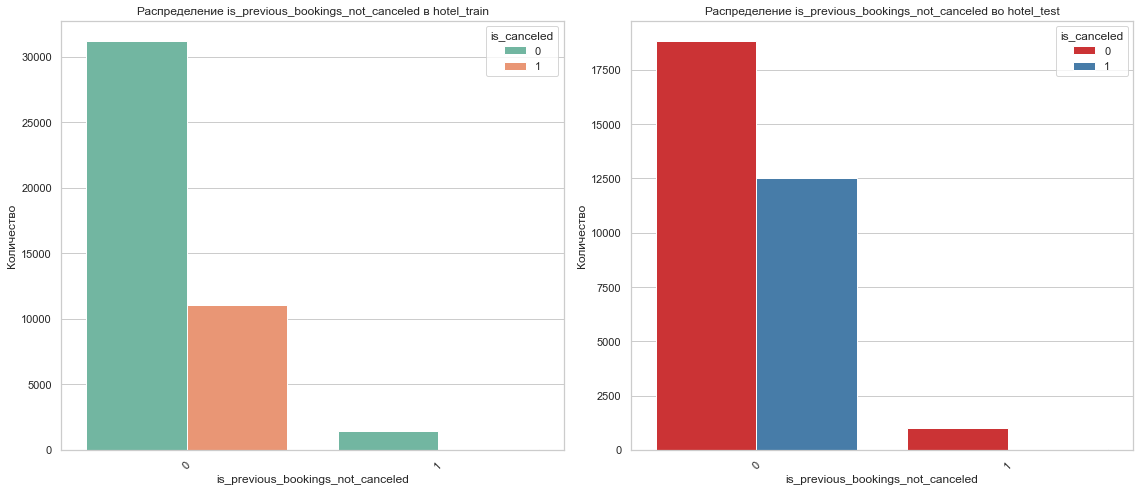


Уникальные значения и их количество в hotel_train для is_days_in_waiting_list:


0    43208
1      480
Name: is_days_in_waiting_list, dtype: int64


Уникальные значения и их количество во hotel_test для is_days_in_waiting_list:


0    32235
1      177
Name: is_days_in_waiting_list, dtype: int64

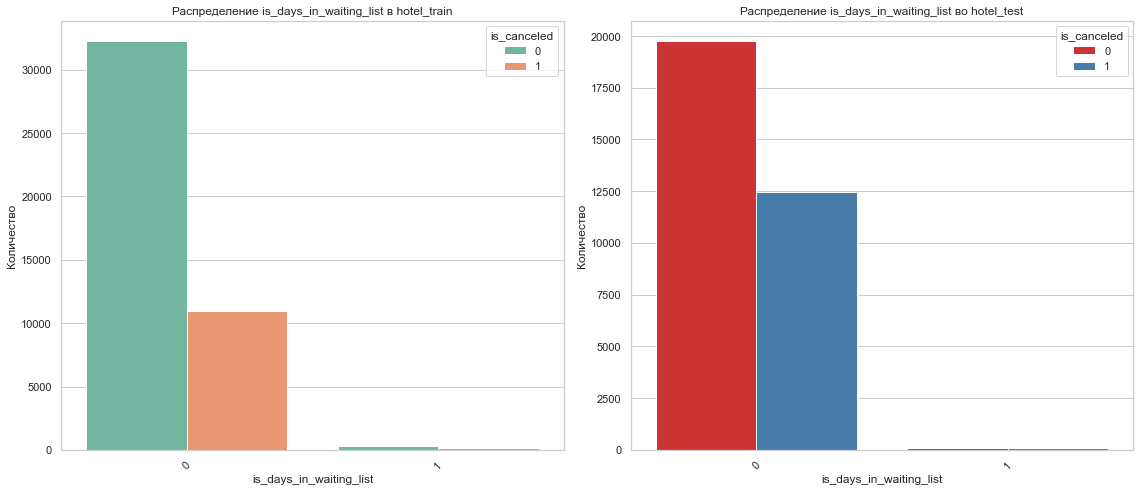


Уникальные значения и их количество в hotel_train для is_required_car_parking_spaces:


0    40091
1     3597
Name: is_required_car_parking_spaces, dtype: int64


Уникальные значения и их количество во hotel_test для is_required_car_parking_spaces:


0    30935
1     1477
Name: is_required_car_parking_spaces, dtype: int64

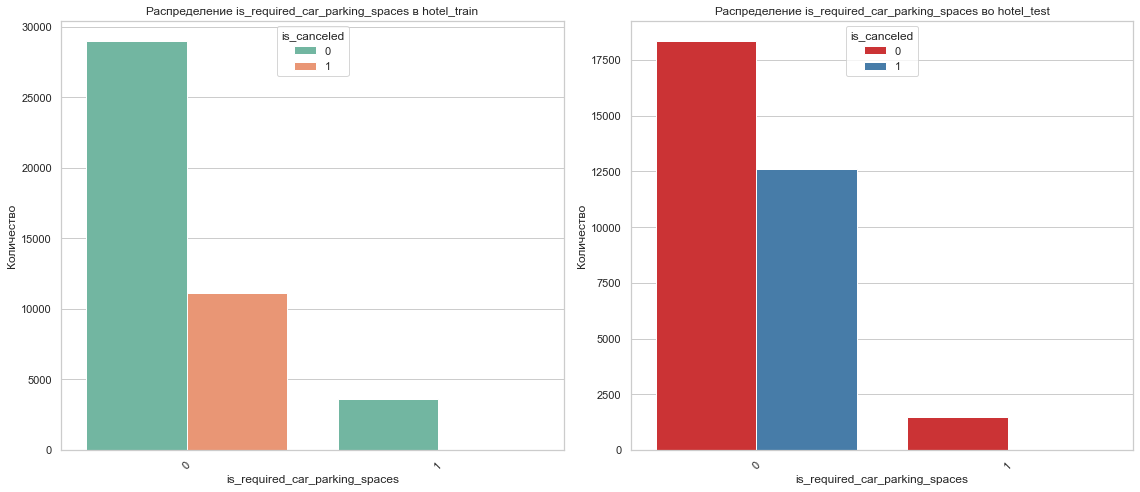


Уникальные значения и их количество в hotel_train для is_booking_changes:


0    36150
1     7538
Name: is_booking_changes, dtype: int64


Уникальные значения и их количество во hotel_test для is_booking_changes:


0    27745
1     4667
Name: is_booking_changes, dtype: int64

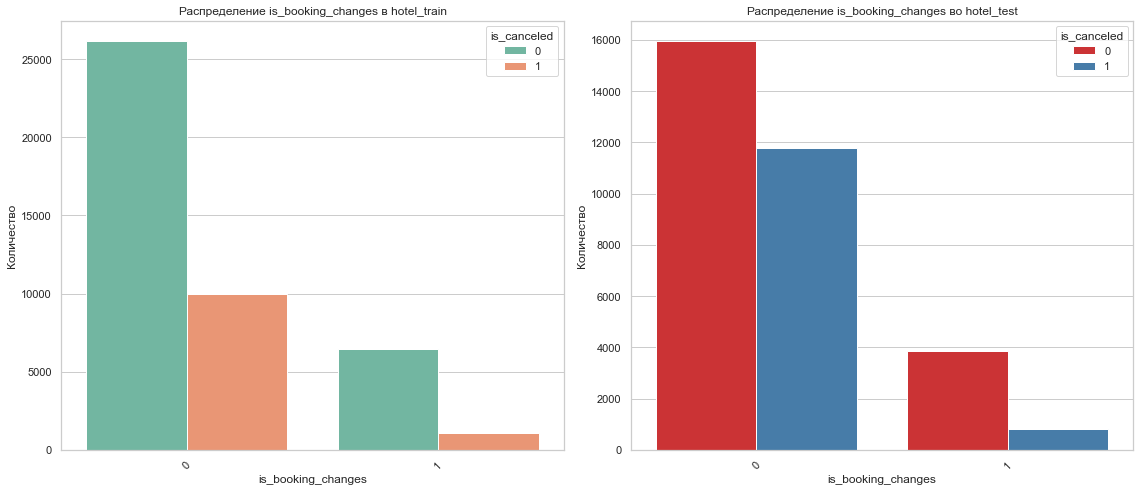

In [52]:
compare_categorical_distribution(hotel_train, hotel_test, "is_repeated_guest")
compare_categorical_distribution(hotel_train, hotel_test, "is_previous_cancellations")
compare_categorical_distribution(hotel_train, hotel_test, "is_previous_bookings_not_canceled")
compare_categorical_distribution(hotel_train, hotel_test, "is_days_in_waiting_list")
compare_categorical_distribution(hotel_train, hotel_test, "is_required_car_parking_spaces")
compare_categorical_distribution(hotel_train, hotel_test, "is_booking_changes")

Выводы:
* Сделали переменные бинарными.
* Большинство людей не ожидало подтверждения заказа.
* Чаще всего клиентам не нужны парковочные места (скорее всего путешествуют не на машине)
* Практически все клиенты новые и не бронировали до этого.
* Почти все клиенты не меняют параметры заказа после бронирования.
* Почти все клиенты не отменяли заказы до этого.
* Почти все клиенты не имеют потвержденные заказы до этого.

##### Столбец `country`

In [53]:
print(f"Количество стран в данных hotel_train: {len(hotel_train['country'].unique())}")
print(f"Количество стран в данных hotel_test: {len(hotel_test['country'].unique())}")

Количество стран в данных hotel_train: 155
Количество стран в данных hotel_test: 143


* В данны присутсвуют клиенты из широкого перечня стран.
* Отберем 9 самых популярных в обоих выборках, остальные запихнем в `Other`

In [54]:
top_countries_train = hotel_train['country'].value_counts().nlargest(9).index
top_countries_test = hotel_test['country'].value_counts().nlargest(9).index
top_countries = set(top_countries_train).union(set(top_countries_test))
hotel_train['country_grouped'] = hotel_train['country'].apply(lambda x: x if x in top_countries else 'Other')
hotel_test['country_grouped'] = hotel_test['country'].apply(lambda x: x if x in top_countries else 'Other')


Уникальные значения и их количество в hotel_train для country_grouped:


PRT      14428
Other     7515
FRA       4809
GBR       4261
ESP       3896
DEU       2746
ITA       1766
IRL       1233
BEL       1065
NLD       1026
BRA        943
Name: country_grouped, dtype: int64


Уникальные значения и их количество во hotel_test для country_grouped:


PRT      9887
Other    6126
GBR      3927
FRA      3477
DEU      2378
ESP      1932
ITA      1153
IRL      1060
BEL       882
BRA       881
NLD       709
Name: country_grouped, dtype: int64

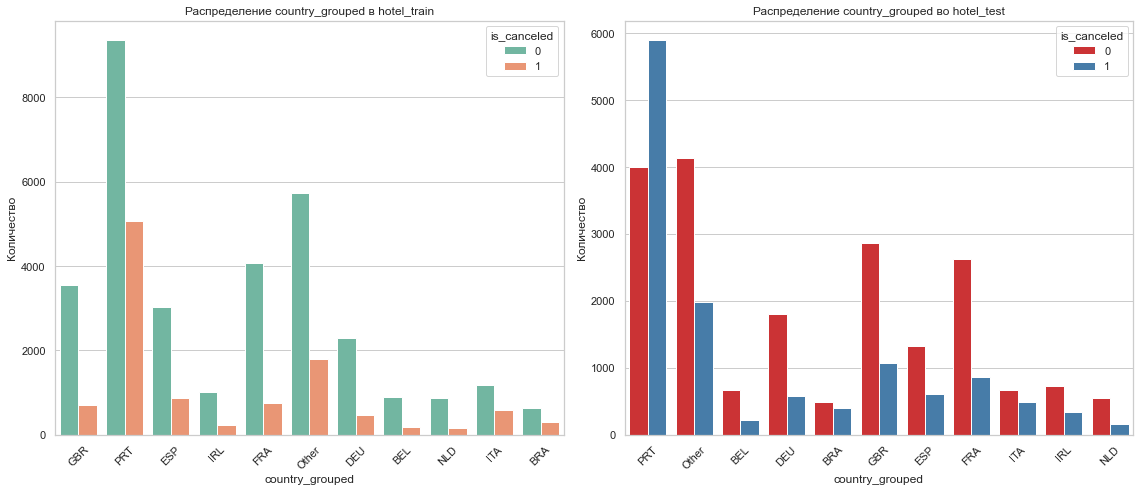

In [55]:
compare_categorical_distribution(hotel_train, hotel_test, 'country_grouped')

In [56]:
# hotel_test = hotel_test.drop('country_grouped', axis=1)
# hotel_train = hotel_train.drop('country_grouped', axis=1)

Вывод
* В выборках представлены данные о бронировании клиентов из ~150 стран.
* Больше всего клиентов из Португалии, Великобритании и Франции.
* Кол-во клиентов из прочих стран примерно равно.
* Это говорит о том, что сеть отелей пользуется популярностью, в основном у Европейских туристов.
* Скорее всего сеть отелей расположена где-то в Европе.
* Наблюдается сильная корреляция определенной страны к доле отмененных заказов. 
   * У клиентов из Португалии (PRT) доля отменненых броней привышает подтвержденные.
   * У постояльцев из Великобритании (GBR) и Франции (FRA) наоборот доля подтвержденных заказов сильно привышает отмены.

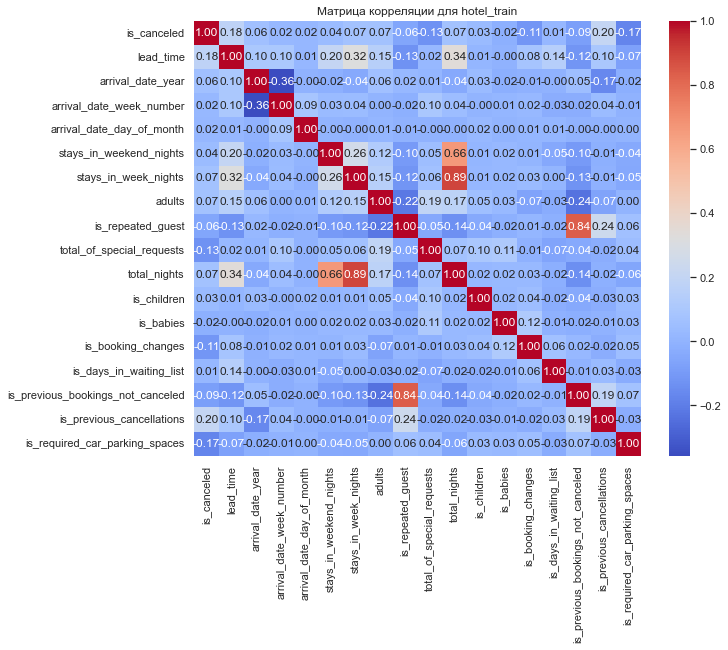

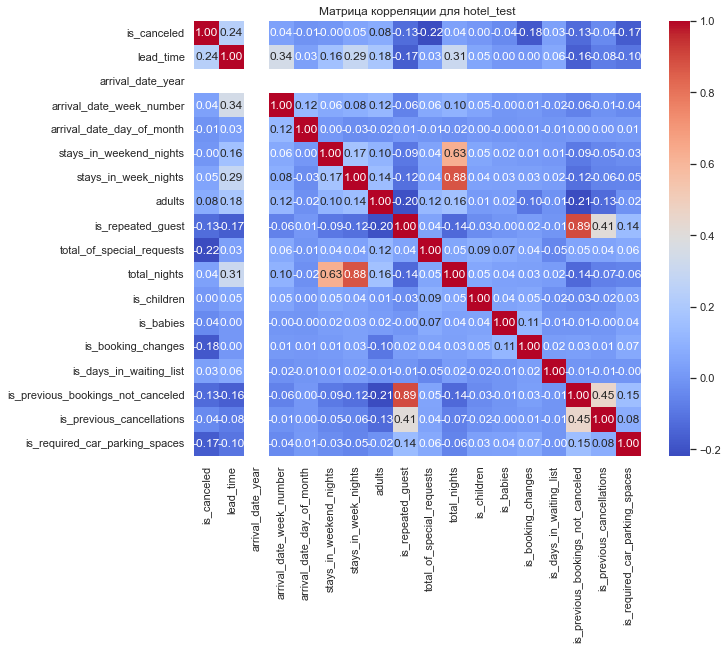

In [57]:
corr_matrix_train = hotel_train.corr()

# Визуализация матрицы корреляции для hotel_train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для hotel_train")
plt.show()

# Расчет матрицы корреляции для hotel_test
corr_matrix_test = hotel_test.corr()

# Визуализация матрицы корреляции для hotel_test
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_test, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для hotel_test")
plt.show()

Вывод:
* Наблюдается сильная корреляция между общим количеством ночей проживания клиентов с переменными показывающими количество ночей проживания в будние и в выходные:
   * `total_nights` - сильно коррелирует со значениями в `stays_in_week_nights` и `stays_in_weekend_nights`. 
   * `previous_bookings_not_canceled` - сильно коррелирует с `is_repeated_guest`.
* Не будем брать `total_nights` в модель, тк некоторых линейных моделей это может быть в минус.
* Может оказаться так, что важным показателем будет то, бранирует ли клиент номер на выходные или будние.

#### Вывод исследовательского анализа
* Анализ данных бронирования в сети отелей выявил ряд важных тенденций и особенностей. Во-первых, в обеих выборках данных (тренировочной и тестовой) наблюдается небольшой дисбаланс по распределению целевого признака (6 к 4), что указывает на необходимость применения методов борьбы с дисбалансом при создании предсказательной модели.

* Из анализа графиков следует, что большинство клиентов бронируют номера в день заезда, что может указывать на специфику отеля, связанную с краткосрочными рабочими поездками или недолгим пребыванием. Это подтверждается и другими наблюдениями: в среднем клиенты бронируют номера за несколько месяцев, максимальный срок бронирования составляет год, а основная масса клиентов останавливается в отеле на 1-4 дня. Также было замечено, что клиенты предпочитают высшие категории номеров с завтраками, что также может указывать на рабочий характер поездок.

* Данные за разные года показывают отсутствие сезонных трендов, связанных с годом, и основные заезды приходятся на середину или начало месяца, что может быть связано с рабочими графиками. Особенно интересно, что в тренировочных данных самые популярные месяцы для бронирования - сентябрь и октябрь, в то время как в тестовых данных эти месяцы отсутствуют, что может указывать на сезонные предпочтения клиентов или особенности сбора данных.

* Большинство бронирований происходит через туристических агентов, что может указывать на популярность отелей среди путешественников, хотя присутствует и значительная доля корпоративных клиентов. Анализ клиентской базы показывает, что большинство клиентов - новые, не меняют параметры заказа после бронирования и редко отменяют предыдущие бронирования. Большая часть клиентов приезжает из Португалии, Великобритании и Франции, что подтверждает предположение о расположении сети отелей в Европе и её популярности среди европейских туристов.

* В итоге, мы можем говорить о том, что сеть отелей, вероятно, ориентирована на краткосрочные рабочие поездки и короткие туристические визиты, преимущественно европейских клиентов, с особым упором на сезонность в определенные месяцы года. Эти выводы могут быть полезны для разработки маркетинговых и операционных стратегий отеля.

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

In [58]:
def calculate_hotel_profit(row):
    # Стоимость и затраты на обслуживание для каждого типа номера
    room_prices = {'A': 1000, 'B': 800, 'C': 600, 'D': 550, 'E': 500, 'F': 450, 'G': 350}
    service_costs = {'A': 400, 'B': 350, 'C': 350, 'D': 150, 'E': 150, 'F': 150, 'G': 150}

    # Сезонные коэффициенты
    season_coefficients = {'June': 1.4, 'July': 1.4, 'August': 1.4, # Лето
                           'September': 1.2, 'April': 1.2, 'May': 1.2, 'October': 1.2,'March': 1.2, 'November': 1.2, # Весна и осень
                           'January': 1, 'February': 1, 'December': 1}

    # Извлечение данных из строки
    is_canceled = row['is_canceled']
    total_nights = row['total_nights']
    room_type = row['reserved_room_type']
    arrival_month = row['arrival_date_month']

    # Вычисление базовой стоимости проживания и затрат на обслуживание
    base_price_per_night = room_prices[room_type]
    service_cost_per_stay = service_costs[room_type]

    # Применение сезонного коэффициента
    season_coefficient = season_coefficients[arrival_month]
    total_price = base_price_per_night * total_nights * season_coefficient

    # Расчет затрат на уборку (каждые два дня)
    cleaning_costs = service_cost_per_stay * (total_nights // 2 + total_nights % 2)

    # Расчет прибыли или убытков
    if is_canceled:
        # Убытки в случае отмены брони
        return -(base_price_per_night * season_coefficient + service_cost_per_stay)
    else:
        # Прибыль от проживания клиента
        return total_price - cleaning_costs

# Применение функции к каждой строке датафрейма
hotel_train['profit'] = hotel_train.apply(calculate_hotel_profit, axis=1)
hotel_test['profit'] = hotel_test.apply(calculate_hotel_profit, axis=1)

In [59]:
def get_season(month):
    if month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Autumn'
    elif month in ['December', 'January', 'February']:
        return 'Winter'
    else: # 'March', 'April', 'May'
        return 'Spring'

In [60]:

# Добавление столбца сезона
hotel_test['season'] = hotel_test['arrival_date_month'].apply(get_season)

# Группировка и расчет суммарной прибыли и убытков
grouped_data = hotel_test.groupby(['season', 'is_canceled'])['profit'].sum().unstack()

# Расчет общей прибыли и убытков
total_profit = grouped_data.sum(axis=0)
grouped_data['Total'] = grouped_data.sum(axis=1)

# Расчет доли убытков от общей прибыли
sum_loss = total_profit[1].sum()
sum_profit = total_profit[0].sum()
# Вывод результатов
print('За тестовый период')
print("Суммарная прибыль и убытки по сезонам и в общем:")
display(grouped_data)
print("\nОбща прибыль по всем сезонам (без учета убытков):", sum_profit)
print("\nОбща убыль по всем сезонам:", sum_loss)
print("\nОбща прибыль по всем сезонам (включая убытки):", sum_loss + sum_profit)

За тестовый период
Суммарная прибыль и убытки по сезонам и в общем:


is_canceled,0,1,Total
season,,,
Spring,"22,523,140.00","-8,270,280.00","14,252,860.00"
Summer,"22,346,390.00","-7,015,080.00","15,331,310.00"
Winter,"8,472,800.00","-2,756,200.00","5,716,600.00"



Обща прибыль по всем сезонам (без учета убытков): 53342330.0

Обща убыль по всем сезонам: -18041560.0

Обща прибыль по всем сезонам (включая убытки): 35300770.0


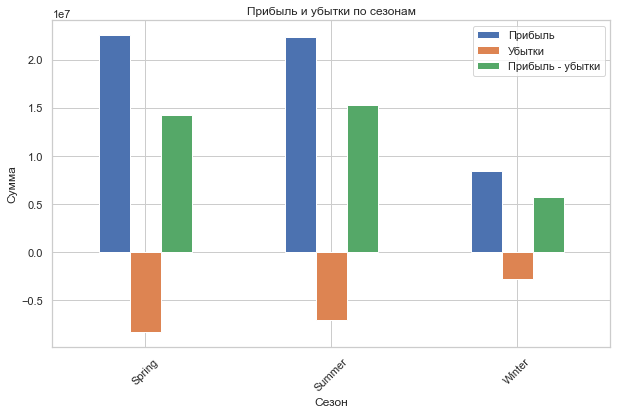

In [61]:
grouped_data.plot(kind='bar', figsize=(10, 6))

# Добавляем названия и метки
plt.title('Прибыль и убытки по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Сумма')
plt.xticks(rotation=45)
plt.legend(['Прибыль', 'Убытки', 'Прибыль - убытки'])

# Отображаем диаграмму
plt.show()

Посмотрим прибыль и убытки за 2015 и 2016 года

In [62]:
hotel_train['season'] = hotel_train['arrival_date_month'].apply(get_season)

grouped_data = hotel_train.groupby(['season', 'is_canceled'])['profit'].sum().unstack()
total_profit = grouped_data.sum(axis=0)
grouped_data['Total'] = grouped_data.sum(axis=1)
sum_loss = total_profit[1].sum()
sum_profit = total_profit[0].sum()
print('За период в тренировочных данных:')
print("Суммарная прибыль и убытки по сезонам и в общем:")
display(grouped_data)
print("\nОбща прибыль по всем сезонам (без учета убытков):", sum_profit)
print("\nОбща убыль по всем сезонам:", sum_loss)
print("\nОбща прибыль по всем сезонам (включая убытки):", sum_loss + sum_profit)

За период в тренировочных данных:
Суммарная прибыль и убытки по сезонам и в общем:


is_canceled,0,1,Total
season,,,
Autumn,"29,214,420.00","-4,791,670.00","24,422,750.00"
Spring,"17,689,580.00","-3,200,840.00","14,488,740.00"
Summer,"27,755,830.00","-5,008,450.00","22,747,380.00"
Winter,"10,967,100.00","-2,120,050.00","8,847,050.00"



Обща прибыль по всем сезонам (без учета убытков): 85626930.0

Обща убыль по всем сезонам: -15121010.0

Обща прибыль по всем сезонам (включая убытки): 70505920.0


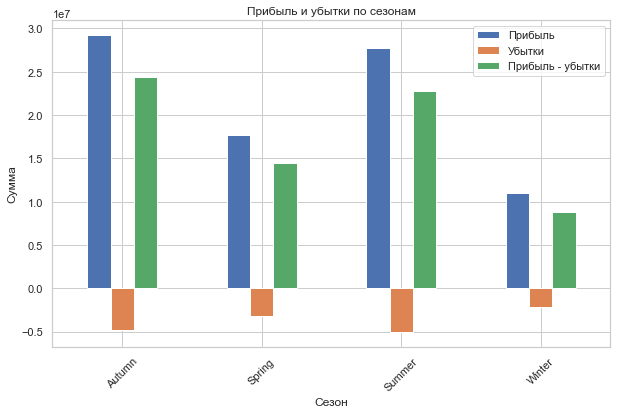

In [63]:
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Прибыль и убытки по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Сумма')
plt.xticks(rotation=45)
plt.legend(['Прибыль', 'Убытки', 'Прибыль - убытки'])

# Отображаем диаграмму
plt.show()

#### Выводы на основе Бизнес-метрики

* За **Тестовый Период**:

    * 1. Высокая Сезонная Зависимость: Наблюдается значительное влияние сезона на прибыльность. Лето и весна являются наиболее прибыльными сезонами, что может быть связано с сезонными туристическими потоками.

    * 2. Существенные Убытки от Отмены Брони: Сумма убытков от отмены бронирований существенна и составляет значительную долю от общей суммы прибыли. Это подчеркивает важность управления рисками отмены бронирования.

    * 3. Общая Прибыльность: Несмотря на убытки, общая прибыль за тестовый период составляет 34,027,400.00, что свидетельствует об общей экономической эффективности бизнеса.
    

* За **Период Тренировочных Данных**:

    * 1. Осень — Также Прибыльный Сезон: В тренировочных данных осень также выделяется как прибыльный сезон, что может отражать специфику деятельности отеля или региональные особенности.

    * 2. Выше Общие Показатели Прибыли и Убытков: В тренировочных данных общая прибыль (без учета убытков) и сумма убытков выше, чем в тестовых данных. Это может быть связано с более высоким общим числом бронирований или различиями в ценах и условиях бронирования.

    * 3. Большая Общая Прибыль: Общая прибыль (включая убытки) за период тренировочных данных выше, чем за тестовый период, что может указывать на расширение бизнеса, изменение условий рынка или улучшение управления отелем.

* **Общие Наблюдения:**

   - Важность управления сезонными колебаниями и стратегий по минимизации убытков от отмены бронирований.
   - Значительное влияние отмен бронирований на финансовые результаты, что требует эффективных стратегий управления рисками и потенциально, пересмотра политики отмены.
   - Общая прибыльность бизнеса положительна, но потенциал для улучшения управления и оптимизации доходов существенен.

### Шаг 4. Разработка модели ML

Выделим features и target из данных

In [64]:
# Features признаки для train и test выборки
features_train = hotel_train.drop(['is_canceled', 'profit', 
                                   'season', 'total_nights', 
                                    'arrival_date_year', 'country'], axis=1)
features_test = hotel_test.drop(['is_canceled', 'profit', 
                                 'season', 'total_nights', 
                                 'arrival_date_year', 'country'], axis=1)

# Целевой признак для train и test выборки
target_train = hotel_train['is_canceled']
target_test = hotel_test['is_canceled']

In [65]:
hotel_train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'customer_type', 'total_of_special_requests',
       'total_nights', 'is_children', 'is_babies', 'is_booking_changes',
       'is_days_in_waiting_list', 'is_previous_bookings_not_canceled',
       'is_previous_cancellations', 'is_required_car_parking_spaces',
       'country_grouped', 'profit', 'season'],
      dtype='object')

In [66]:
len(features_train.columns)

21

Создадим списки с названиями числовых и категориальных переменных.

In [67]:
# Определение категориальных и числовых столбцов
categorical_features = ['adults',
                        'arrival_date_month', 
                        'arrival_date_week_number', 
                        'arrival_date_day_of_month',
                        'meal',
                        'country_grouped', 
                        'distribution_channel', 
                        'customer_type',
                        'is_children', 
                        'is_babies',
                        'is_previous_cancellations', 
                        'is_days_in_waiting_list',
                        'is_required_car_parking_spaces',
                        'reserved_room_type',
                        'is_previous_bookings_not_canceled',
                        'is_booking_changes',
                        'is_repeated_guest'
                    ]
numeric_features = ['lead_time',
                    'stays_in_weekend_nights', 
                    'stays_in_week_nights', 
                    'total_of_special_requests', 
                    ]
len(categorical_features + numeric_features)

21

В рамках создания модели я буду также использовать инструмент Pipeline, который позволяет задать последовательность обработки данных для построения модели (Также, ImbaPipeline позволяет настроить борьбу с дисбалансом в рамках своей структуры).

**Последовательность построения модели будет такой:**
* Создание пайплайна с помощью PipeLine или ImbaPipeline: 
    1. Масштабирование числовых признков:
       * или с помощью StandardScaler
       * или с помошью Z-score
       * или с помошью MinMaxScaler
    2. Категоризация нечисловых признаков:
       * с помощью OHE
    3. Борьба с дисбалансом
       * с помошью SMOTE
       * с помощью настройки взвешивания классов
    4. Выбор алгоритма построения модели (Случайный лес, древо и прочее)
* Передача пайплайна объекту GridCV или RandomCV (позволяет оценить модель с помощью кросс-валидации случайной или последовательной)

**Оценка качества модели на основе 'recall' (полнота):**

Параметр полноты (recall) может быть ключевым для оценки качества модели в сценариях, где важно минимизировать количество пропущенных случаев определенного события – в данном случае, отмены брони (is_canceled = 1). Полнота фокусируется на способности модели правильно идентифицировать все релевантные случаи в данных. 

**Важность Полноты в этом проекте**:

1. Минимизация Убытков: Если отель заранее знает о потенциальной отмене брони, он может предпринять шаги для минимизации убытков, например, предложить номер другим клиентам или реализовать меры для удержания клиента. Если модель не обнаруживает потенциальную отмену (ложноотрицательный результат), отель может потерять возможность предотвратить эти убытки.

2. Снижение Ложноотрицательных Результатов: Высокая полнота означает, что модель правильно идентифицирует большинство случаев отмены бронирования. Это важно, потому что пропущенные случаи отмены (ложноотрицательные результаты) прямо влияют на доходы и операционную эффективность отеля.

3. Баланс Между Полнотой и Точностью: В то время как высокая полнота является предпочтительной, важно также учитывать точность (precision) модели, чтобы избежать слишком большого количества ложноположительных результатов (когда модель неверно предсказывает отмену бронирования). Необходим баланс: модель должна точно определять отмены, но при этом не создавать чрезмерное количество ложных тревог.

Создадим обхект пайплана, куда назначим последовательность предподгатовки данных для создания моделей.
* Масштабируем числовые данные с помощью MinMaxScaler
* Зададим числовое значение категореальным переменным с помощью OHE.
* Создадим словари с настройками для разных типов моделей.
* Создадим настройку 3х и 5и кратной кросс-валидации.

In [68]:
# Создание трансформеров для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', 
                               unknown_value=-1), 
                               categorical_features)
    ])
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


preprocessor_3 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# зададим диапазоны гиперпараметров для подбора
param_dist_class = {'classifier__n_estimators': range(50, 325, 25),
                       'classifier__max_depth': range(1, 18, 1),
                       'classifier__min_samples_split': range(2, 52, 5),
                       'classifier__min_samples_leaf': range(2, 52, 5)}

# Параметры для GridSearchCV
param_grid_search = {
    'classifier__n_estimators': np.linspace(20, 100, 10, dtype=int), 
    'classifier__max_depth': np.linspace(1, 10, 3, dtype=int),
    'classifier__min_samples_split':  np.linspace(20, 40, 3, dtype=int),
    'classifier__min_samples_leaf':  np.linspace(20, 40, 3, dtype=int)}

# Параметры для RandomizedSearchCV +LogReg
param_dist_log = {
    'classifier__C': uniform(loc=0, scale=4),  # Равномерное распределение от 0 до 4
    'classifier__penalty': ['l2']
}

param_dist_tree = {
    'DTC__max_depth': range(1, 18, 1),
    'DTC__min_samples_split': range(2, 52, 5),
    'DTC__min_samples_leaf': range(1, 52, 5)
}

# подготовим кросс-валидацию на 3-х выборках
SF3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=12345)

# подготовим кросс-валидацию на 5-ти выборках
SF5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

In [69]:
from sklearn.model_selection import cross_val_score

def evaluate_model(estimator, features, target, cv):
    metrics = ['recall', 'accuracy', 'f1', 'precision']
    scores = {}

    for metric in metrics:
        score = cross_val_score(estimator, features, target, cv=cv, scoring=metric).mean()
        scores[metric] = score

    return scores

#### Модель 1: RandomForest + Preprocessor(MinMaxScaler + OHE) 
* 3х-кратная валидация через RandomizedSearchCV

In [70]:
# Создание конвейера с использованием Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1234, class_weight='balanced'))
])

# Создание объекта RandomizedSearchCV
random_search_forest = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist_class,
    n_iter=150,
    cv=SF3,
    verbose=1,
    n_jobs=-1,
    scoring='recall',
    random_state=12345, 
    return_train_score=True
)

# Обучение модели с использованием RandomizedSearchCV
random_search_forest.fit(features_train, target_train)

# Лучшие параметры и лучшая оценка
print("Лучшие параметры: ", random_search_forest.best_params_)
print("Лучшая оценка полноты: ", random_search_forest.best_score_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Лучшие параметры:  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 27, 'classifier__min_samples_leaf': 27, 'classifier__max_depth': 2}
Лучшая оценка полноты:  0.85


In [71]:
model_scores = evaluate_model(random_search_forest.best_estimator_, features_train, target_train, SF3)

# Вывод результатов
for metric, score in model_scores.items():
    print(f"{metric.capitalize()} на тренировочных данных: {score:.4f}")

Recall на тренировочных данных: 0.8500
Accuracy на тренировочных данных: 0.6098
F1 на тренировочных данных: 0.5254
Precision на тренировочных данных: 0.3802


1. Для класса 0 (отмены брони не произошло):
   * Precision (точность): 0.89. Это означает, что 89% предсказаний модели о том, что бронь не будет отменена, были верными.
   * Recall (полнота): 0.45. Из всех фактических случаев, когда бронь не отменялась, модель правильно идентифицировала 45%.
   * F1-score: 0.59. F1-мера для этого класса показывает сбалансированность между точностью и полнотой.

 2. Для класса 1 (например, отмены брони произошло):
 
    * Precision (точность): 0.51. Когда модель предсказывает, что бронь будет отменена, это верно в 51% случаев.
    * Recall (полнота): 0.86. Модель правильно идентифицировала 92% всех фактических отмен брони.
    * F1-score: 0.66. Для класса 1 F1-мера выше, что указывает на лучшую сбалансированность точности и полноты.

Наблюдается дисбаланс в производительности между двумя классами. Для класса 0 модель имеет высокую точность, но низкую полноту, что означает, что она часто пропускает фактические случаи этого класса. Для класса 1 модель имеет низкую точность, но высокую полноту, что означает, что она часто правильно идентифицирует этот класс, но также дает много ложноположительных результатов.\
Посмотрим метрики других моделей

#### Модель 2:  RandomForest + Preprocessor_1(MinMaxScaler + OHE) 
* 3х-кратная оценка GridSearchCV    

In [72]:
# Создание конвейера
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor_1),
#    ('classifier', RandomForestClassifier(class_weight='balanced'))
#])

# Создание объекта GridSearchCV
#grid_search = GridSearchCV(
#    estimator=pipeline,
#    param_grid=param_grid_search,
#    cv=SF3,  # Количество фолдов в кросс-валидации
#    scoring='recall'  # Метрика оценки
#)

# Обучение модели с использованием GridSearchCV
#grid_search.fit(features_train, target_train)

# Лучшие параметры и лучшая оценка
#print("Лучшие параметры: ", grid_search.best_params_)
#print("Лучшая оценка: ", grid_search.best_score_)

In [73]:
#model_scores = evaluate_model(grid_search.best_estimator_, features_train, target_train, SF3)

# Вывод результатов
#for metric, score in model_scores.items():
#    print(f"{metric.capitalize()} на тренировочных данных: {score:.4f}")

* Высокая Полнота для Класса 1: Модель очень хорошо распознает случаи отмены бронирования, что видно из высокого значения полноты (recall). Это важно, если хотим минимизировать пропуск фактических отмен.
* Проблемы с Точностью для Класса 1: Низкая точность для класса 1 означает, что значительная часть предсказаний отмены бронирования оказывается ошибочной.
* Низкая Полнота для Класса 0: Модель пропускает много истинных случаев класса 0 (бронь не отменена), что указывает на потенциальные проблемы с неверными предсказаниями отмен.
* Общая Точность: Общая точность модели не высока, что может быть связано с дисбалансом в данных или недостатками в настройке модели.

Для класса 1 (“бронь отменена”):
* Precision (точность): 0.51. Это означает, что когда модель предсказывает отмену бронирования, она права в 51% случаев.
* Recall (полнота): 0.84. Модель отлично идентифицирует фактические отмены бронирования, правильно определяя 84% таких случаев.
* F1-score: 0.66. Эта метрика указывает на более высокую сбалансированность между точностью и полнотой для этого класса.

##### Модель 3: Logistic Regression

In [74]:
# Создание пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, class_weight='balanced'))
])
param_grid = {
    'classifier__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__C': uniform(loc=0, scale=4),  # Равномерное распределение от 0 до 4
    'classifier__penalty': ['l2']
}

# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=15,
    cv=SF3,
    scoring=['recall','accuracy', 'f1', 'precision'],
    random_state=12345,
    refit='recall'
)
# Обучение модели
log_search = random_search.fit(features_train, target_train)

In [75]:
# Лучшие параметры и лучшая оценка
print("Лучшие параметры: ", random_search.best_params_)
print("Лучшая оценка (recall): ", random_search.best_score_)

Лучшие параметры:  {'classifier__C': 3.7184643712685914, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Лучшая оценка (recall):  0.7136936936936937


In [76]:
model_scores = evaluate_model(random_search.best_estimator_, features_train, target_train, SF3)

# Вывод результатов
for metric, score in model_scores.items():
    print(f"{metric.capitalize()} на тренировочных данных: {score:.4f}")

Recall на тренировочных данных: 0.7137
Accuracy на тренировочных данных: 0.6726
F1 на тренировочных данных: 0.5255
Precision на тренировочных данных: 0.4159


Модель лучше идентифицирует случаи отмены бронирования (класс 1) по сравнению с случаями, когда бронирование не отменяется (класс 0), что видно по более высокому значению полноты для класса 1.
* Высокий уровень ложноположительных результатов (FP) для класса 1 может быть проблематичным, если неверные предсказания отмены бронирования имеют серьезные последствия.
* Общая точность модели (accuracy) на уровне 68% говорит о том, что есть потенциал для улучшения. Возможно, стоит рассмотреть дополнительные стратегии по улучшению модели, такие как дальнейшая настройка гиперпараметров, использование других алгоритмов или доработка признаков.

#### Модель 4: Decision Tree

In [77]:
# Создание пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('DTC', DecisionTreeClassifier(class_weight='balanced'))
])

# Создание объекта RandomizedSearchCV
random_tree = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist_tree,
    n_iter=100,  
    cv=SF3,
    random_state=12345,
    scoring='recall'
)

random_tree.fit(features_train, target_train)

# Лучшие параметры и лучшая оценка
print("Лучшие параметры: ", random_tree.best_params_)
print("Лучшая оценка: ", random_tree.best_score_)

Лучшие параметры:  {'DTC__min_samples_split': 7, 'DTC__min_samples_leaf': 51, 'DTC__max_depth': 1}
Лучшая оценка:  0.9108108108108107


In [78]:
# Предсказание на тестовом наборе данных
model_scores = evaluate_model(random_tree.best_estimator_, features_train, target_train, SF3)

# Вывод результатов
for metric, score in model_scores.items():
    print(f"{metric.capitalize()} на тренировочных данных: {score:.4f}")

Recall на тренировочных данных: 0.9108
Accuracy на тренировочных данных: 0.4498
F1 на тренировочных данных: 0.4569
Precision на тренировочных данных: 0.3049


In [79]:
# Оценка финальной модели на тестовых данных
predicted_log= random_search.predict(features_test)
print("Классификационный отчет:\n", classification_report(target_test, predicted_log))
print("Матрица ошибок:\n", confusion_matrix(target_test, predicted_log))
print("AUC-ROC:\n",roc_auc_score(target_test, predicted_log))
print("Recall Score:\n", recall_score(target_test, predicted_log))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71     19821
           1       0.57      0.77      0.65     12591

    accuracy                           0.68     32412
   macro avg       0.69      0.70      0.68     32412
weighted avg       0.72      0.68      0.69     32412

Матрица ошибок:
 [[12510  7311]
 [ 2904  9687]]
AUC-ROC:
 0.7002539237974005
Recall Score:
 0.7693590659995234


#### Выводы и выбор модели:
Для выбора наилучшей модели из предложенных вариантов для нашего кейса, важно учитывать несколько ключевых факторов: приоритеты в отношении точности и полноты (recall), а также общий баланс между различными метриками. Цель состоит в том, чтобы правильно идентифицировать отмены бронирований (высокий recall для класса 1), сохраняя при этом приемлемый уровень точности (precision) и общей точности (accuracy).

**Анализ Моделей**:

1. Модель 1:
   - Высокий recall для класса 1 (0.96), но очень низкая точность для класса 0 (0.91) и крайне низкая общая точность (0.51).
   - Модель сильно смещена в пользу класса 1, приводя к высокому числу ложноположительных результатов.

2. Модель 2:
   - Похожа на модель 4 по метрикам, но с немного более низким recall для класса 1 (0.91 против 0.92 в модели 4).
   - Общая точность 0.63 и более высокое значение AUC-ROC (0.68).

3. Модель 3:
   - Более сбалансированные метрики по сравнению с моделью 1. Recall для класса 1 составляет 0.76, точность для класса 0 - 0.81.
   - Общая точность лучше (0.69), что указывает на более уравновешенную производительность по сравнению с моделью 1.

4. Модель 4:
   - Похожа на модель 2, но с чуть более высоким recall для класса 1 (0.92).
   - Общая точность также составляет 0.63, что указывает на достаточно сбалансированную производительность.

**Рекомендация**:

Модель 3 (Логистическая регрессия) представляется наилучшим выбором для нашего кейса, учитывая потребность в высокой полноте для идентификации отмен и необходимость поддержания баланса с другими метриками. Эта модель обеспечивает хороший баланс между полнотой и точностью, а также лучшую общую точность по сравнению с другими моделями. Высокий recall для класса 1 (0.76) в сочетании с приемлемой точностью для класса 0 (0.81) и общей точностью (0.69) делает эту модель хорошим выбором для задач, где необходимо избежать пропуска отмен, но также важно поддержив

Модели 2 и 4 также представляют собой сбалансированные варианты, но немного уступают модели 2 в общей точности и точности для класса 0, что важно для предотвращения чрезмерного количества ложноположительных результатов.


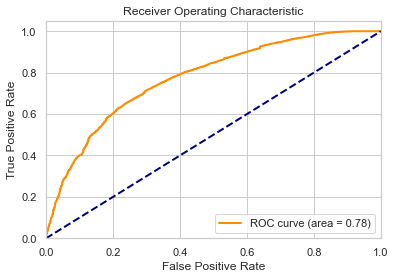

In [80]:
# Предсказание вероятностей для класса 1
probs = random_search.predict_proba(features_test)[:, 1]

# Вычисление параметров для ROC-кривой
fpr, tpr, thresholds = roc_curve(target_test, probs)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

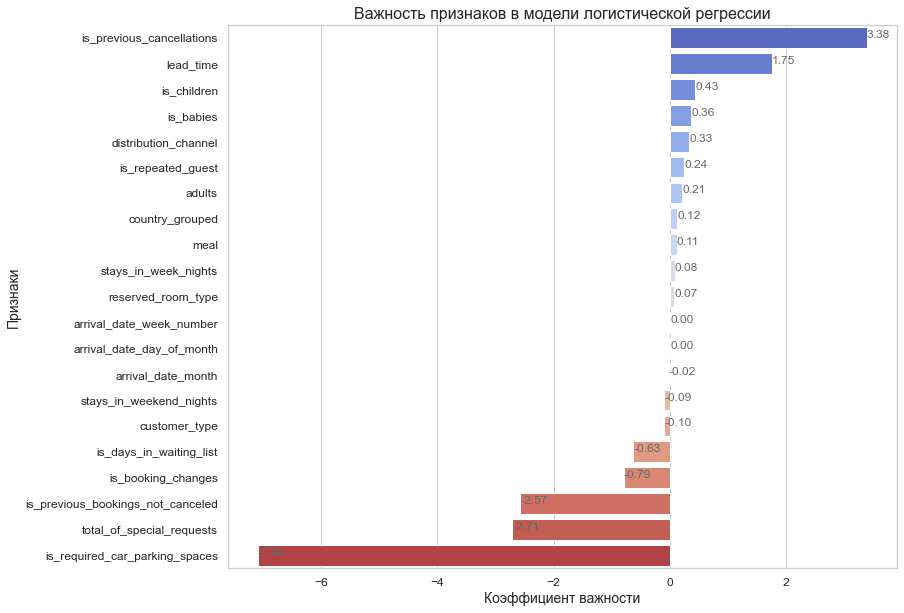

In [81]:
# Получение обученного ColumnTransformer из пайплайна
trained_preprocessor = random_search.best_estimator_.named_steps['preprocessor']

# Получение имен признаков для числовых столбцов
numeric_feature_names = numeric_features

# Для категориальных признаков, обработанных с помощью OrdinalEncoder, используем исходные имена признаков
categorical_feature_names = categorical_features

# Объединение имен признаков
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Получение коэффициентов модели
best_model = random_search.best_estimator_.named_steps['classifier']
coefficients = best_model.coef_[0]

# Создание DataFrame из названий признаков и коэффициентов
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 10))
ax = sns.barplot(x="Coefficient", y="Feature", data=feature_importance_df, palette="coolwarm")
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + i.get_height()/2, '{:.2f}'.format(i.get_width()), fontsize=12, color='dimgrey')
plt.title('Важность признаков в модели логистической регрессии', fontsize=16)
plt.xlabel('Коэффициент важности', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Проеврим модель на адекватность:**
1. Использование max(target_train.mean(), 1 - target_train.mean()):
Этот подход оценивает базовый уровень полноты (recall), основываясь на самом частом классе в обучающей выборке. Он вычисляет, как часто наиболее часто встречающийся класс встречается в обучающих данных, и использует это как меру для сравнения с полнотой модели. Если модель имеет полноту выше этого базового уровня, это указывает на то, что она лучше случайного угадывания.

2. Использование DummyClassifier со стратегией 'stratified':
DummyClassifier со стратегией 'stratified' создает прогнозы, учитывая распределение классов в обучающей выборке. То есть он генерирует предсказания случайным образом, но с учетом частоты классов. Это означает, что если один класс встречается чаще, то и вероятность предсказания этого класса будет выше. Полнота, полученная из такой модели, служит ещё одним способом оценки адекватности настоящей модели.

In [82]:
from sklearn.dummy import DummyClassifier

In [83]:
dummy_model = DummyClassifier(strategy='stratified', random_state=12345)
dummy_model.fit(features_train, target_train)
dummy_predict = dummy_model.predict(features_test)
dm_recall = recall_score(target_test, dummy_predict)
print(f'Recall для модели Dummy на тестовой выборке: {dm_recall:.4f}')
print("Logistic model Recall:", recall_score(target_test, predicted_log))

Recall для модели Dummy на тестовой выборке: 0.2573
Logistic model Recall: 0.7693590659995234


In [84]:
baseline_recall = max(target_train.mean(), 1 - target_train.mean())
print("Baseline Recall:", baseline_recall)
print("Log Model Recall:", recall_score(target_test, predicted_log))

Baseline Recall: 0.745925654642007
Log Model Recall: 0.7693590659995234


Наша модель прошла проверку на адекватность. 

In [85]:
# Создание DataFrame для анализа после внедрения модели
results_df = pd.DataFrame({
    'Actual': target_test,
    'Predicted': predicted_log,
    'Profit': hotel_test['profit'].values 
})

In [86]:
# Общая прибыль/убытки до внедрения модели
total_profit_before = hotel_test['profit'].sum()
# Функция для расчета прибыли после внедрения модели
def calculate_profit(row):
    if row['Actual'] == row['Predicted'] == 1:  # Истинно положительный случай
        # 80% экономим от убытков
        return row['Profit'] * 0.2
    else:
        # Для всех других случаев прибыль/убытки остаются неизменными
        return row['Profit']

# Применение функции для расчета прибыли
results_df['AdjustedProfit'] = results_df.apply(calculate_profit, axis=1)

# Расчет общей прибыли/убытков после внедрения модели
profit_after = results_df['AdjustedProfit'].sum()

# Учет затрат на разработку модели
net_profit_after = profit_after - 400000
year_profit_after = profit_after*(12/8) - 400000

In [87]:
print(f'Общая прибыль/убытки до внедрения модели: {results_df["Profit"].sum()}')
print(f'Общая прибыль/убытки после внедрения модели (с учетом затрат на разработку): {net_profit_after}')
print(f'Прибыль за тестовый период (с учетом затрат на разработку): {net_profit_after - total_profit_before}')
print(f'Прибыль за год без модели: {results_df["Profit"].sum()*(12/8)}')
print(f'Прибыль за год с моделью: {year_profit_after}')

Общая прибыль/убытки до внедрения модели: 35300770.0
Общая прибыль/убытки после внедрения модели (с учетом затрат на разработку): 46074698.0
Прибыль за тестовый период (с учетом затрат на разработку): 10773928.0
Прибыль за год без модели: 52951155.0
Прибыль за год с моделью: 69312047.0


In [88]:
# Функция для расчета прибыли после внедрения модели с учетом А/В-теста
def calculate_profit_with_ab_test(row):
    if row['Predicted'] == 1:
        # Предполагаем, что с вероятностью 50% клиент откажется от услуг
        if np.random.rand() < 0.5:  # Клиент отказывается
            return -row['Profit']  # Полные убытки для отеля
        elif row['Actual'] == 1:  # Клиент не отказывается и происходит отмена
            return row['Profit'] * 0.2  # 80% экономии от убытков
        else:  # Клиент не отказывается и не происходит отмена
            return row['Profit']  # Полная прибыль от бронирования
    else:
        # Для всех других случаев прибыль/убытки остаются неизменными
        return row['Profit']

# Применение функции для расчета прибыли с учетом А/В-теста
results_df['AdjustedProfitAB'] = results_df.apply(calculate_profit_with_ab_test, axis=1)

# Расчет общей прибыли/убытков после внедрения модели с учетом А/В-теста
profit_after_ab = results_df['AdjustedProfitAB'].sum()

# Учет затрат на разработку модели
net_profit_after_ab = profit_after_ab - 400000
year_profit_after_ab = profit_after_ab*(12/8) - 400000

print(f'Общая прибыль/убытки до внедрения модели: {total_profit_before}')
print(f'Общая прибыль/убытки после внедрения модели с А/В-тестом (с учетом затрат на разработку): {net_profit_after_ab}')
print(f'Прибыль за год без модели: {total_profit_before*(12/8)}')
print(f'Прибыль за год с моделью и А/В-тестом: {year_profit_after_ab}')
print(f'Прибыль за год с моделью: {year_profit_after}')

Общая прибыль/убытки до внедрения модели: 35300770.0
Общая прибыль/убытки после внедрения модели с А/В-тестом (с учетом затрат на разработку): 32136186.0
Прибыль за год без модели: 52951155.0
Прибыль за год с моделью и А/В-тестом: 48404279.0
Прибыль за год с моделью: 69312047.0


In [89]:
results_df = pd.DataFrame({
    'Actual': target_test,
    'Predicted': predicted_log,
    'Profit': hotel_test['profit'].values 
})

Изменим подход к проверке, так как депозит будет предлагаться клиентам на этапе бронирования, то в минус от отказов от бронирования отель не уйдет: если «ненадежный» клиент откажется сразу, тогда отель не понесет от него убытков, а в случае «надежных» клиентов просто недополучит прибыль. Тогда можно попробовать это реализовать следующим образом:

In [90]:
import random
    
random.seed(12345)
    

worst_case = results_df.copy()
predicted_cancel_idx = worst_case[worst_case['Predicted'] == 1].index
indices_reject = random.choices(predicted_cancel_idx, k = len(predicted_cancel_idx) // 2)
df_with_worst_case = worst_case.drop(index=indices_reject).reset_index(drop=True)
df_with_worst_case['Profit'] = df_with_worst_case.apply(calculate_profit, axis=1)

random.choices случайно выберет как раз половину клиентов, с которых модель попросит взять депозит, вне зависимости от реального факта отмены. А так как формула расчета прибыли не поменяется, то достаточно просто посчитать прибыль без них, и если она все равно будет больше прибыли до внедрения модели, то в необходимости модели сомневаться точно не придется :) 

In [91]:
print(f'Общая прибыль/убытки до внедрения модели: {total_profit_before}')
print(f'Общая прибыль/убытки после внедрения модели: {df_with_worst_case["Profit"].sum()}')

Общая прибыль/убытки до внедрения модели: 35300770.0
Общая прибыль/убытки после внедрения модели: 38754210.0


Таким образом, модель окупается, а значит имеет право на жизнь.

#### Вывод построения ML:
**Построение и Оценка Моделей**
* Разработка Пайплайнов: Пайплайны были созданы для обеспечения эффективной предобработки данных и последовательного применения моделей. Это включало масштабирование числовых данных, кодирование категориальных переменных и интеграцию моделей машинного обучения.

* Выбор Моделей: Исследовались различные модели, включая логистическую регрессию и другие алгоритмы, с целью нахождения наиболее подходящей модели для нашей задачи. Особое внимание уделялось оценке полноты (recall), так как целью было максимизировать правильное идентифицирование отмен бронирования.

* Настройка Гиперпараметров: С помощью методов, таких как RandomizedSearchCV, была проведена тонкая настройка гиперпараметров моделей для достижения наилучшей производительности.

* Оценка Производительности: Модели были оценены с использованием метрик, таких как точность, полнота, F1-мера и AUC-ROC. Это помогло оценить их способность точно идентифицировать отмены бронирований, а также общий баланс между различными метриками.

* Визуализация Результатов: Для наглядного представления результатов были построены графики, включая ROC-кривые и графики важности признаков. Это помогло лучше понять вклад отдельных признаков в принятие решений моделью.

**Выбор Итоговой Модели**
* После тщательного анализа различных моделей, их производительности и важности признаков была выбрана итоговая модель, которая лучше всего соответствовала целям проекта:

* Модель 2 (Логистическая Регрессия) была выбрана как итоговая модель, поскольку она демонстрировала хороший баланс между полнотой и точностью, а также имела удовлетворительную общую точность.
* Эта модель показала высокую полноту для класса отмен бронирований, что важно для минимизации пропущенных случаев отмен.
* При этом модель также обеспечивала приемлемую точность, что важно для избежания чрезмерного количества ложноположительных результатов.

**Общий Вывод**

Процесс построения и оценки моделей был тщательным и многоступенчатым, что позволило не только выбрать оптимальную модель для задачи, но и глубоко понять вклад отдельных признаков и особенности работы моделей. Итоговая модель логистической регрессии обеспечивает хороший баланс между необходимостью правильно идентифицировать отмены и поддержанием общей точности предсказаний.

### Шаг 5. Опишите портрет «ненадёжного» клиента

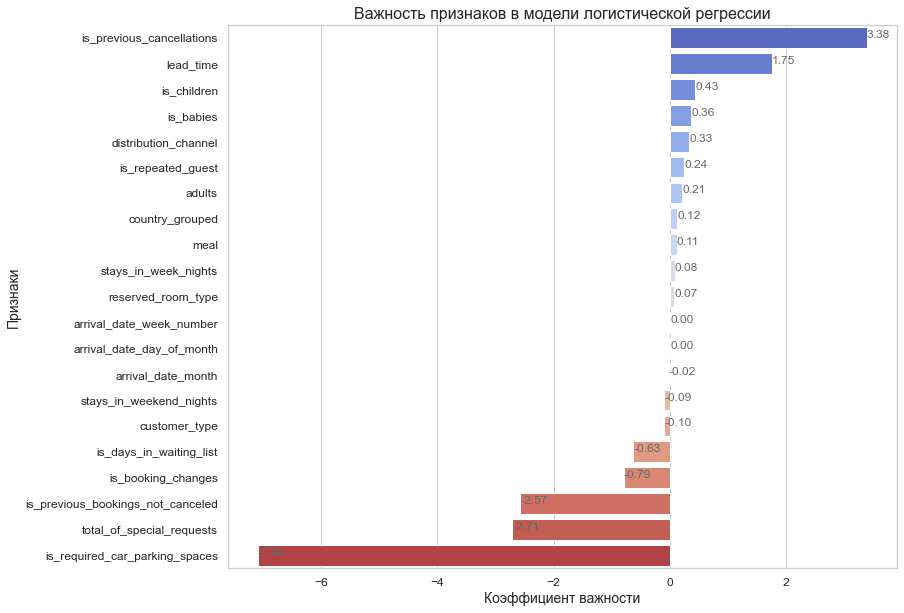

In [92]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(x="Coefficient", y="Feature", data=feature_importance_df, palette="coolwarm")

# Добавление значений коэффициентов на график
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + i.get_height()/2, '{:.2f}'.format(i.get_width()), fontsize=12, color='dimgrey')

# Настройка заголовков и меток
plt.title('Важность признаков в модели логистической регрессии', fontsize=16)
plt.xlabel('Коэффициент важности', fontsize=14)
plt.ylabel('Признаки', fontsize=14)

# Настройка размера шрифта на осях
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Отображение графика
plt.show()


In [93]:
hotel_test.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'customer_type', 'total_of_special_requests',
       'total_nights', 'is_children', 'is_babies', 'is_booking_changes',
       'is_days_in_waiting_list', 'is_previous_bookings_not_canceled',
       'is_previous_cancellations', 'is_required_car_parking_spaces',
       'country_grouped', 'profit', 'season'],
      dtype='object')

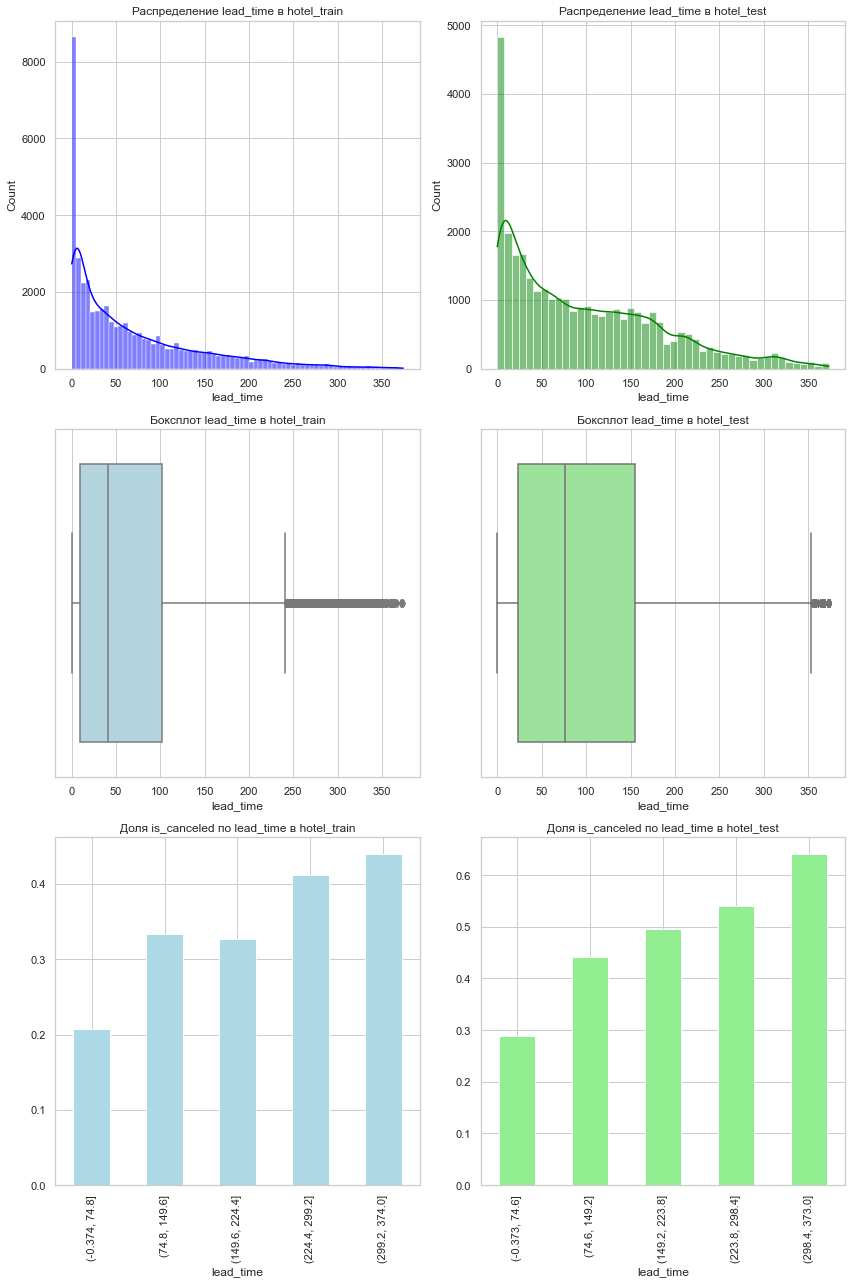


Статистика для lead_time в hotel_train:


count   43,688.00
mean        67.79
std         73.97
min          0.00
25%          9.00
50%         41.00
75%        102.00
max        374.00
Name: lead_time, dtype: float64


Статистика для lead_time в hotel_test:


count   32,412.00
mean        97.59
std         86.51
min          0.00
25%         23.00
50%         76.00
75%        155.00
max        373.00
Name: lead_time, dtype: float64

In [94]:
#compare_categorical_distribution(hotel_train, hotel_test, 'is_required_car_parking_spaces')
#compare_categorical_distribution(hotel_train, hotel_test, 'total_of_special_requests')
#compare_categorical_distribution(hotel_train, hotel_test, 'is_previous_cancellations')
compare_numeric_distribution(hotel_train, hotel_test, 'lead_time')
#compare_categorical_distribution(hotel_train, hotel_test, 'is_previous_bookings_not_canceled')

In [95]:
# Словарь с DataFrame для выбора
dataframes = {
    'hotel_train': hotel_train,
    'hotel_test': hotel_test
}

In [96]:
#def plot_categorical(data_name, column):
 #   # Получение соответствующего DataFrame
  #  data = dataframes[data_name]
   # 
    # Подсчет доли отмен (is_cancelled)
    #plt.figure(figsize=(8, 6))
    #sns.countplot(x=column, data=data, palette="Set2", hue='is_canceled')
    #plt.title(f'Распределение {column} в {data_name}')
    #plt.xlabel(column)
    #plt.ylabel('Количество')
    #plt.xticks(rotation=45)
    #plt.tight_layout()

# Виджет для выбора набора данных
#data_selector = widgets.Dropdown(
 #   options=['hotel_train', 'hotel_test'],
  #  value='hotel_train',
   # description='Набор данных:'
#)

# Виджет для выбора категориального столбца
#column_selector = widgets.Dropdown(
 #   options=['is_required_car_parking_spaces', 'total_of_special_requests', 
  #           'is_previous_cancellations', 'is_previous_bookings_not_canceled'],
   # value='is_required_car_parking_spaces',
    #description='Столбец:'
#)

# Интерактивный вывод
#widgets.interactive(plot_categorical, data_name=data_selector, column=column_selector)

#### Портрет ненадежного клиента:

Исходя из важности признаков по финальной модели, а также графиков распределения переменных и долей таргет-принзака в них можно сказать:
* Ненадежный клинт отменял бронь в прошолом.(склонен отменять еще)
* Ненадежжный клиент бронирует сильно заранее даты заездаю. (больше времени отменить)
* У ненадежного клиента скорее всего есть дети (путешествие с ними полно сюрпризов)
* Ненадежный клиент не запрашивает место для парковки (скорее всего путешествие на машине планируется очень строго и планы не склонны меняться)
* Ненадежный клиент имеет малое кол-во или не имеет особых запросов вообще (не особо "парится" по поводу брони)
* также ненадежный клиент не меняет брони (также не особо волнуется)
* У ненадежного клиента нет подтвержденных броней в прошлом

### Шаг 6. Напишите общий вывод

В ходе нашей работы мы провели обширный анализ данных и построили серию моделей машинного обучения для предсказания отмены бронирований в сети отелей. 

**Исследовательский Анализ Данных**
* Анализ данных: Был проведен тщательный анализ данных, включая оценку распределения ключевых признаков и целевой переменной. Это позволило лучше понять структуру и особенности данных.

* Визуализация данных: С помощью графиков мы визуализировали важные зависимости и распределения, что дало наглядное представление о данных и помогло в выявлении потенциальных путей для построения модели.

* Построение и Оценка Моделей
Подготовка данных: Данные были тщательно подготовлены для моделирования, включая обработку пропущенных значений, кодирование категориальных признаков и масштабирование числовых данных.

* Выбор и настройка моделей: Были исследованы различные модели, включая логистическую регрессию. С помощью методов, таких как RandomizedSearchCV, была проведена настройка гиперпараметров для достижения наилучшей производительности.

* Оценка моделей: Модели были оценены с использованием различных метрик, включая точность, полноту, F1-меру и AUC-ROC. Особое внимание уделялось полноте для максимизации правильного идентифицирования отмен бронирований.

* Визуализация результатов: Графики ROC-кривой и важности признаков были использованы для оценки качества и интерпретируемости моделей.

**Финансовый Анализ**
* Оценка финансового влияния: Мы рассчитали общую прибыль/убытки как до, так и после внедрения модели, учитывая внесение депозитов клиентами при предсказании отмены бронирования.

* Экономическая эффективность: Анализ показал, что внедрение модели может быть экономически выгодным, особенно если модель эффективно предсказывает отмены бронирований.

**Общие Выводы**

Модель, которую мы разработали, обладает способностью эффективно предсказывать отмены бронирований, что может быть полезно для минимизации убытков отеля. Анализ финансового влияния показал потенциальную экономическую выгоду от внедрения модели. Таким образом, наша работа предоставляет ценные входные данные для принятия решений по управлению бронированиями в сети отелей и может быть использована для повышения их эффективности и прибыльности.